<h1 style="text-align: center; color: #a3c3e7;">COVID-19 IN INDIA</h3>

**What context or story prompted the student group to search for data?**

- The group is interested in the COVID-19 situation in Asia and wants to search for data related to the number of infections and deaths due to COVID-19 in this region to serve research and analysis purposes, specifically the COVID-19 dataset in India, where it is currently the country with the highest number of deaths in the Asian region.

**What is the topic of the data that the student group collected, and where did they obtain it?**

- The data selected by the student group is "COVID-19 in India" from the Kaggle datasets: https://www.kaggle.com/sudalairajkumar/covid19-in-india.
This dataset provides information on the number of COVID-19 infections in India by state and district from January 30, 2020 to August 11th, 2021.

**Is the use of this data allowed? For example, do you need to check the license of the data?**

- The "COVID-19 in India" dataset has a CC0 1.0 Universal license, meaning that the data is available for anyone to use, modify, and share without requiring permission or payment, so the group has the right to use this dataset.

**How was this data collected? What was the method used?**

- The "COVID-19 in India" dataset from Kaggle is a collection of official reports from the Indian government and local health agencies. The data is collected through the Indian Disease Surveillance Programme (IDSP) system and updated daily. The data fields, including confirmed cases, recoveries, and deaths, are updated daily and by state/district.


# 1. Library Importing

In [285]:
"""
    import necessary libraries, and
    note that `geopandas` and `plotly` are external libs. Using `pip` 
    command to install them by entering in terminal 
    `pip install -r requirements.txt`
"""
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px

# 2. Data Reading

In [286]:
"""import dataset"""
df_India=pd.read_csv("../datasets/covid_19_india.csv")
df_India

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
18105,18106,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353
18106,18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660
18107,18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18108,18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812


# 3. Data Pre-processing

**Is data preprocessing necessary and if so, how should the student group process it?**

- Data preprocessing may be necessary to prepare the data for further analysis and exploration. The following preprocessing steps should be performed:
    - Remove unnecessary columns such as `Time`, `Sno`, `ConfirmedIndianNational`, and `ConfirmedForeignNational`.
    - Check the `State` column for data inconsistencies such as spelling errors, remove rows with incorrect spellings or not a state name.
    - Check and handle missing data (if any).
    - Convert the data type of the `Date` column from string to date data type.
- After preprocessing, data exploration and analysis steps can be performed to extract important insights from the data.

## 3.1. Removing unused columns

In [287]:
"""Remove `Time` Columns as they do not make much sense or have many NaN values"""
df_India.drop(['Sno','Time','ConfirmedIndianNational','ConfirmedForeignNational'],axis=1,inplace=True)
df_India

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3
...,...,...,...,...,...
18105,2021-08-11,Telangana,638410,3831,650353
18106,2021-08-11,Tripura,77811,773,80660
18107,2021-08-11,Uttarakhand,334650,7368,342462
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812


**What does each row mean? Are there any issues with rows having different meanings?**

- Each row in the "COVID-19 in India" dataset represents a record of the number of COVID-19 infections in a specific state or union territory of India on a particular day. 
- There are no issues with rows having different meanings in this dataset. All rows have the same meaning and structure.

**What is the meaning of each column?**

- Each column in the "COVID-19 in India" dataset has the following meanings:
State/UnionTerritory: the name of the state or union territory.
    - `State`/`UnionTerritory`: name of the state or union territory.
    - `Confirmed`: number of confirmed COVID-19 infections.
    - `Deaths`: number of COVID-19 deaths.
    - `Recovered`: number of individuals who have recovered from COVID-19.
    - `Date`: the date the record was updated.
- These columns provide information on the COVID-19 situation in different states or union territories of India during the period from the first recorded case to the end of the dataset.

In [288]:
"""Return all types of columns in the dataset"""
df_India.dtypes

Date                    object
State/UnionTerritory    object
Cured                    int64
Deaths                   int64
Confirmed                int64
dtype: object

**What is the data type of each column in the "COVID-19 in India" dataset? Is there any column with an inappropriate data type that cannot be further processed?**

- Each column in the "COVID-19 in India" dataset has the following data types:
    - `State`/`UnionTerritory`: string.
    - `Confirmed`: integer.
    - `Deaths`: integer.
    - `Recovered`: integer.
    - `Date`: string.
- There is no column with an inappropriate data type that cannot be further processed. However, the Date column is currently a string data type and will need to be converted to a date data type to perform some time-related analysis operations.

## 3.2. Resolving mis-spelled values

In [289]:
"""Check the number of unique values in `State/UnionTerritory` column"""
df_India['State/UnionTerritory'].nunique()

46

In [290]:
"""See all unique values in `State/UnionTerritory` column"""
df_India['State/UnionTerritory'].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Lakshadweep', 'Telangana', 'Dadra and Nagar Haveli', 'Bihar****',
       'Madhya Pradesh***', 'Himanchal Pradesh', 'Karanataka',
       'Maharashtra***'], dtype=object)

In [291]:
"""Declare a set of data containing the mis-spelled name (key) and the corresponding original name (value)"""
name_corr_set = {
  'Dadra and Nagar Haveli':'Dadra and Nagar Haveli and Daman and Diu',
  'Bihar****': 'Bihar',
  'Daman & Diu':'Dadra and Nagar Haveli and Daman and Diu',
  'Madhya Pradesh***': 'Madhya Pradesh',
  'Maharashtra***': 'Maharashtra',
  'Andaman and Nicobar Islands': 'Andaman & Nicobar',
  'Jammu and Kashmir': 'Jammu & Kashmir',
  'Karanataka':'Karnataka',
  'Himanchal Pradesh':'Himachal Pradesh',
  'Telengana': 'Telangana'
}

In [292]:
""" Replace state name in case has some impurities or mis-spelled."""
def nameCorr(name):
    try:
        return name_corr_set[name]
    except:
        return name

df_India['State/UnionTerritory'] = df_India['State/UnionTerritory'].apply(nameCorr)
df_India['State/UnionTerritory'].nunique()

38

## 3.3. Handling missing values

In [293]:
"""See the tuple of rows and columns in the dataset"""
df_India.shape

(18110, 5)

In [294]:
"""See full information about how many non-null values and kind of datatypes of columns"""
df_India.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Date                  18110 non-null  object
 1   State/UnionTerritory  18110 non-null  object
 2   Cured                 18110 non-null  int64 
 3   Deaths                18110 non-null  int64 
 4   Confirmed             18110 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 707.5+ KB


In [295]:
"""See if there are any missing values in columns"""
df_India.isnull().sum()

Date                    0
State/UnionTerritory    0
Cured                   0
Deaths                  0
Confirmed               0
dtype: int64

### <b> There is zero null values found in all columns in the dataset </b> 

## 3.4. Changing data type

In [296]:
"""Change the format of date"""
df_India['Date'] = pd.to_datetime(df_India['Date'])
df_India['Date']

0       2020-01-30
1       2020-01-31
2       2020-02-01
3       2020-02-02
4       2020-02-03
           ...    
18105   2021-08-11
18106   2021-08-11
18107   2021-08-11
18108   2021-08-11
18109   2021-08-11
Name: Date, Length: 18110, dtype: datetime64[ns]

# 4. Data Manipulation


In [297]:
"""Calculate active cases"""
df_India['Active'] = df_India['Confirmed'] - df_India['Cured'] - df_India['Deaths']
df_India

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active
0,2020-01-30,Kerala,0,0,1,1
1,2020-01-31,Kerala,0,0,1,1
2,2020-02-01,Kerala,0,0,2,2
3,2020-02-02,Kerala,0,0,3,3
4,2020-02-03,Kerala,0,0,3,3
...,...,...,...,...,...,...
18105,2021-08-11,Telangana,638410,3831,650353,8112
18106,2021-08-11,Tripura,77811,773,80660,2076
18107,2021-08-11,Uttarakhand,334650,7368,342462,444
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812,545


In [298]:
"""Check the Top 10 Active Cases"""
df_India.groupby(['State/UnionTerritory'])['Active'].max().sort_values(ascending=False).reset_index().nlargest(10, ['Active'])

,State/UnionTerritory,Active
0,Maharashtra,701614
1,Karnataka,605515
2,Kerala,445692
3,Tamil Nadu,313048
4,Uttar Pradesh,310783
5,Rajasthan,212753
6,Andhra Pradesh,211554
7,Gujarat,148297
8,West Bengal,132181
9,Chhattisgarh,131245


In [299]:
"""Using pivot function to find confirmed, cured, deaths cases for state wise"""
statewise=pd.pivot_table(df_India,values=['Confirmed','Cured','Deaths'],index='State/UnionTerritory',aggfunc='max')
statewise

,Confirmed,Cured,Deaths
State/UnionTerritory,,,
Andaman & Nicobar,7548,7412,129
Andhra Pradesh,1985182,1952736,13564
Arunachal Pradesh,50605,47821,248
Assam,576149,559684,5420
Bihar,725279,715352,9646
Cases being reassigned to states,9265,0,0
Chandigarh,61992,61150,811
Chhattisgarh,1003356,988189,13544
Dadra and Nagar Haveli and Daman and Diu,10654,10646,4


In [300]:
"""Correlation among Columns of Pivot table"""
statewise.corr()

,Confirmed,Cured,Deaths
Confirmed,1.000000,0.999896,0.910479
Cured,0.999896,1.000000,0.911929
Deaths,0.910479,0.911929,1.000000


In [301]:
"""Calculate total confirmed,cured and deaths case by day in India"""
datewise = df_India.groupby(["Date"]).agg({"Confirmed":"sum","Cured":"sum","Deaths":"sum", "Active": "sum"})
datewise

,Confirmed,Cured,Deaths,Active
Date,,,,
2020-01-30,1,0,0,1
2020-01-31,1,0,0,1
2020-02-01,2,0,0,2
2020-02-02,3,0,0,3
2020-02-03,3,0,0,3
...,...,...,...,...
2021-08-07,31895385,31055861,427371,412153
2021-08-08,31934455,31099771,427862,406822
2021-08-09,31969954,31139457,428309,402188


In [302]:
print("Basic Information")
print("Total number of Confirmed cases in India :", datewise["Confirmed"].iloc[-1])
print("Total number of Cured cases in India :", datewise["Cured"].iloc[-1])
print("Total number of Deaths cases in India    :", datewise["Deaths"].iloc[-1])
print("Total number of Active cases in India    :", datewise["Active"].iloc[-1])
print("Total number of Closed cases in India    :", (datewise["Cured"].iloc[-1]+datewise["Deaths"].iloc[-1]))

Basic Information
Total number of Confirmed cases in India : 32036511
Total number of Cured cases in India : 31220981
Total number of Deaths cases in India    : 429179
Total number of Active cases in India    : 386351
Total number of Closed cases in India    : 31650160


# 5. Data visualization

## 5.1. Univariate Analysis

### State/UnionTerritory

- <b> Type of Plot </b>: Count PLot
-  <b> Reason </b>: show the occurence of observations in a categorical variable using bars. In this case, count plot (histogram) is used to display the counts of each State or UnionTerritory in `State/UnionTerritory` category-based bin to see if one has either the most or least counts which leads to the fact that it was the state affected by COVID-19 earliest or latest, separately. 

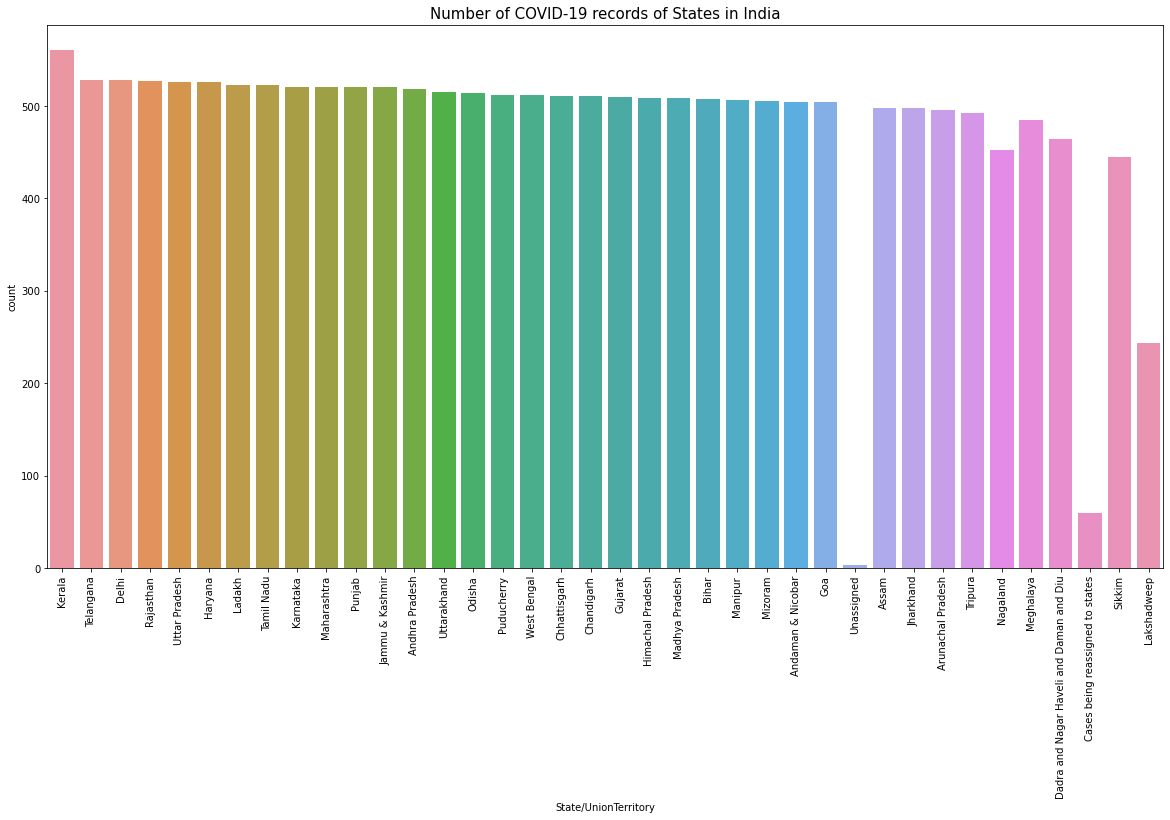

In [303]:
"""Count plot of State/UnionTerritory"""
fig = plt.figure(figsize=(20, 10))
sns.countplot(x = df_India['State/UnionTerritory'])
plt.xticks(rotation=90)
plt.title('Number of COVID-19 records of States in India',size=15)
fig.set_facecolor('white')
plt.show()

#### Conclusion: 
- **Kerala** was the first state to have been affected by COVID-19 as it had the first case of COVID-19 infection reported in India whereas the three states (**Daman & Diu**, **Himachai Pradesh**, **Karnataka**) are among the states in which COVID-19 outbreak occured most recently. 
- Almost all the states were affected simultaneously, as they have counts allocated approximately evenly (about 500 records) 
- There is no zero counts in any observations in the `State/UnionTerritory` column indicates that the disease outbreak spread across all states / union territories in India. 

### Confirmed, Deaths, Cured

- <b> Type of Plot </b>: KDE PLot
-  <b> Reason </b>: KDE plot (known as a **smoothed** version of histogram) is a description of the distribution of a numeric variable, using kernel density esitmate to show the probability density function of the variable. By plotting the probability density function of the data, a KDE plot can show us the shape of the distribution, including whether it is symmetric or skewed, and whether it has multiple peaks or is unimodal. This information can be useful in identifying patterns and trends in the data, as well as in identifying potential outliers or anomalies. In this case, KDE plot is used to visualize a univariate distribution of observations in the dataset including `Confirmed`, `Deaths` and `Cured` fields. 
    - For `Confirmed`: better understand the spread and density of the confirmed cases across different states and territories in India. 
    - For `Deaths`: provide insights into the shape and spread of the distribution of the number of deaths due to COVID-19 in different states and union territories of India. By using a KDE plot, we can also compare the distribution of deaths across different regions in India and identify any significant differences. This information can be valuable for making informed decisions related to public health policy and resource allocation.
    - For `Cured`: understand the distribution of the number of people who have recovered from COVID-19 across different states and territories in India

In [304]:
"""Get mode, median, mean of the data by each field"""
def shape_info(plot,df,args):
    # Get the coordinate (x,y) that contains the max density (y)
    data = plot.lines[0].get_xydata() # each element has shape of (1,2)
    mode = data[np.where(data[:, 1] == max(data[:, 1]))][0,0]
    
    # Get the median, median 
    median = np.median(df[args])
    mean = np.mean(df[args])
    
    return mode,median,mean

(329699.0464628583, 344951.0, 843311.9210526316)

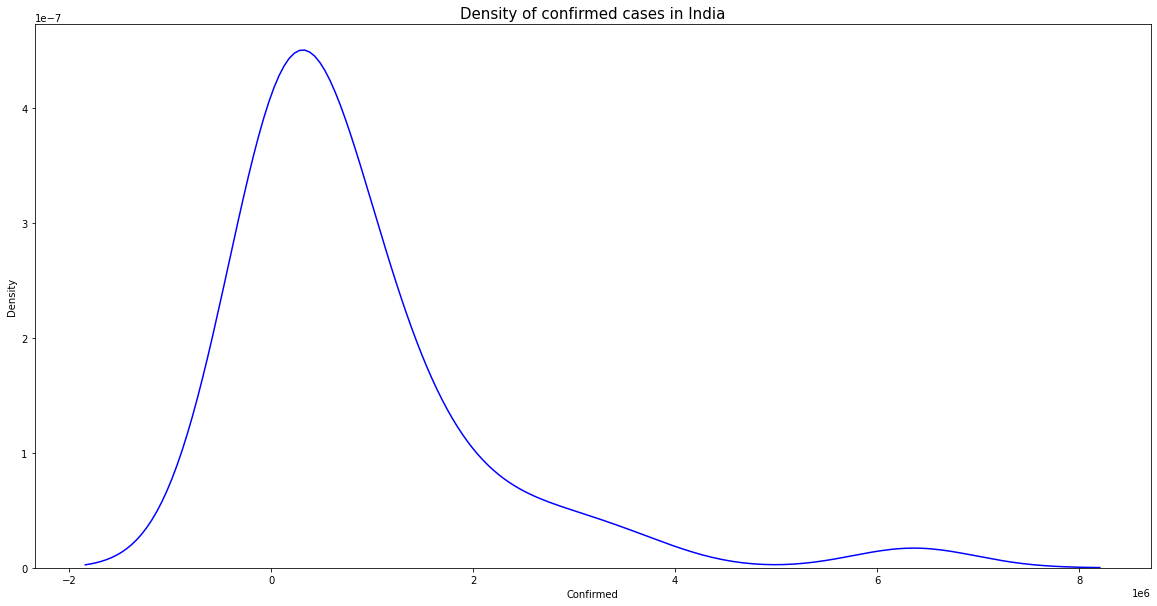

In [305]:
"""KDE plot of Confirmed"""
fig = plt.figure(figsize=(20,10))
kdeplot = sns.kdeplot(data=statewise,x='Confirmed',color='blue')

plt.title('Density of confirmed cases in India',size=15)
fig.set_facecolor('white')

mode, median, mean = shape_info(kdeplot,statewise,'Confirmed')
mode, median, mean

(5413.701296462023, 4761.0, 11294.184210526315)

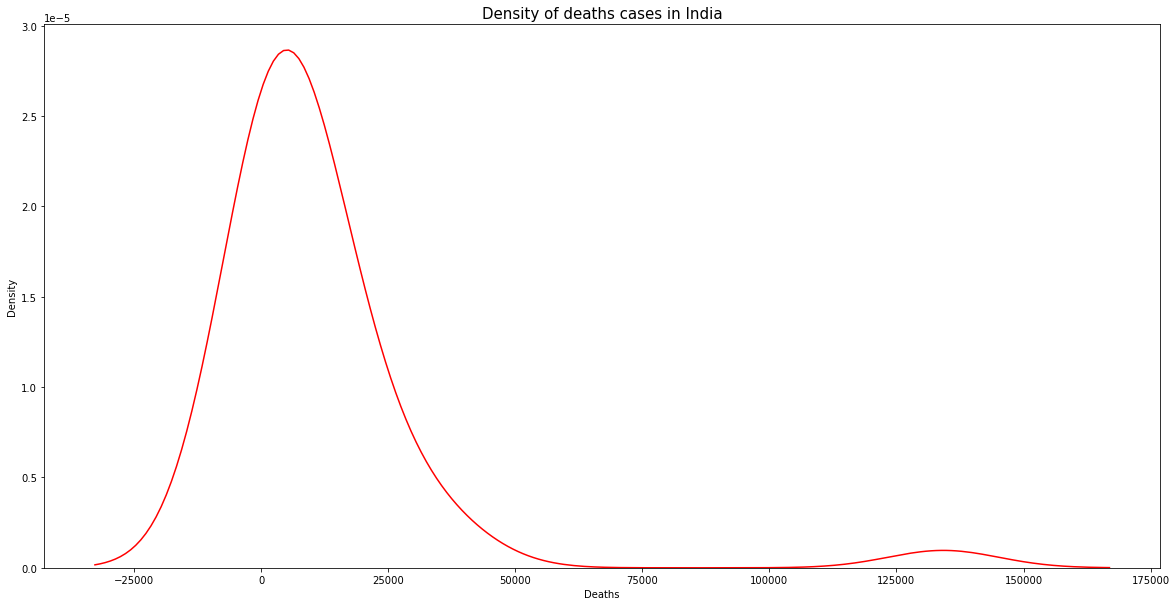

In [306]:
"""KDE plot of Deaths"""
fig = plt.figure(figsize=(20,10))
kdeplot = sns.kdeplot(data=statewise,x='Deaths',color='red')
fig.set_facecolor('white')
plt.title('Density of deaths cases in India',size=15)
mode, median, mean = shape_info(kdeplot,statewise,'Deaths')
mode, median, mean

(318681.82832944905, 338376.0, 821604.7631578947)

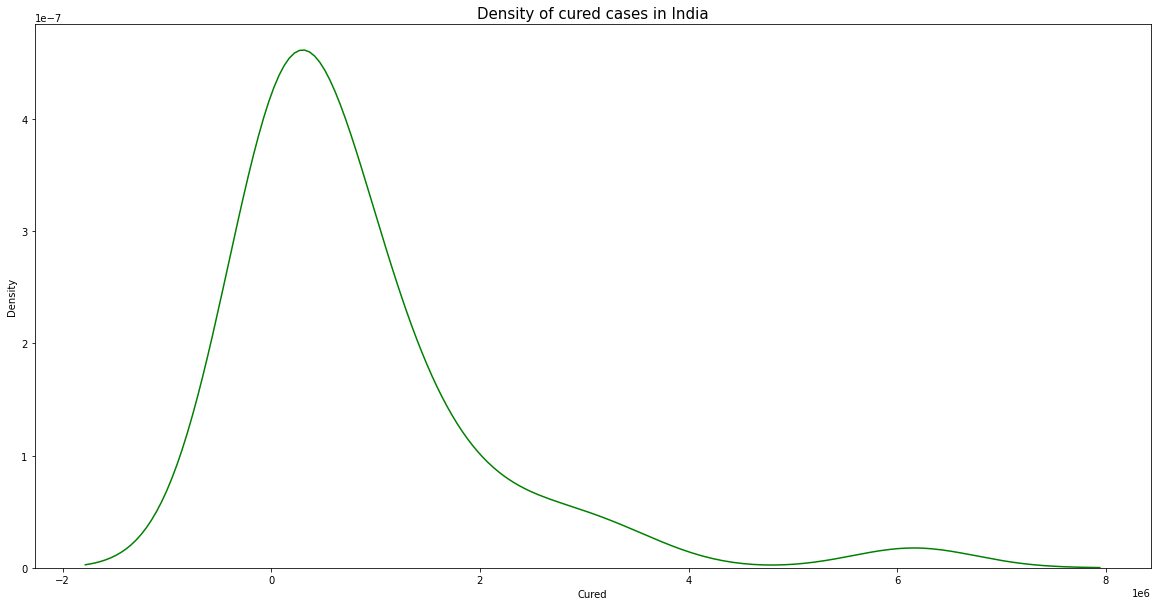

In [307]:
"""KDE plot of Cured"""
fig = plt.figure(figsize=(20,10))
kdeplot = sns.kdeplot(data=statewise,x='Cured',color='green')
fig.set_facecolor('white')
plt.title('Density of cured cases in India',size=15)
mode, median, mean = shape_info(kdeplot,statewise,'Cured')
mode, median, mean

#### Conclusion: 
-  The three plots all show a unimodal distribution. As we can see, the tail of distribution curve is longer on the right side (higher values), meaning that the outliers are further out towards the right and closer to the mean on the left. All of that indicates the distribution is right-skewed (mode < median < mean), suggesting that there are some high values that are driving up the mean.
    - The distribution of the `Confirmed` column in the dataset is highly skewed and  there are a few states/territories with very high numbers of confirmed COVID-19 cases. The trend value of the number of COVID-19 infections is most concentrated around 300,000, indicating that India is facing a serious epidemic situation and there is a need for effective prevention, surveillance and treatment measures to minimize the impact of this disease on health and economy.
    - The majority of the states/union territories in India have a relatively low number of deaths (below 20,000 deaths), while a few have a significantly higher number of deaths. It can be inferred that during the COVID-19 outbreak, the difference in severity of the pandemic situation between states/territories in India is very large, as some areas have been hit much harder than others. The peak of the distribution is also much narrower than that of `Confirmed` and `Cured`, indicating that the range of values for Deaths is much smaller than that of the other variables.
    - There is a larger number of observations which have higher values in the `Cured` column. Although many cases have recovered, there are still a significant number of cases that are continuing with treatment and have not been cured.
- In addition, the distribution curve of `Confirmed` and `Cured` are somewhat **similar** (*unimodal*, close to *normal distribution*), meaning that the number of confirmed cases and cured cases are related. 
Having similar distribution curves between these two variables may indicate a correlation between them, possibly `Confirmed` and `Cured` having a relationship. However, having a similar distribution curve is merely a correlation between two variables, not implying that the correlation is a cause or effect of other factors in the data. We have to take some serious consideration to explore the correlation and determine if there are any relationships (maybe casual) between `Confirmed`, `Cured` or even `Deaths`

## 5.2. Bivariate Analysis

### Confirmed Cases by Month of Year

- <b> Type of Plot </b>: Line PLot
-  <b> Reason </b>: Line plot is a good choice for visualizing the trend of a variable over time. In this case, we are visualizing the number of confirmed COVID-19 cases in India by month of the year, so a line plot can effectively show the changes in the number of cases over time. By plotting the data points in order and connecting them with a line, we can see the overall trend and any seasonal patterns that may exist. This allows us to better understand the trajectory of the outbreak and identify any potential patterns or trends that may emerge over time.

/var/folders/5v/ylqqgnyx0bx4rblw32tgr5f40000gn/T/ipykernel_3806/3804911390.py:5: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/5v/ylqqgnyx0bx4rblw32tgr5f40000gn/T/ipykernel_3806/3804911390.py:10: UserWarning:

FixedFormatter should only be used together with FixedLocator



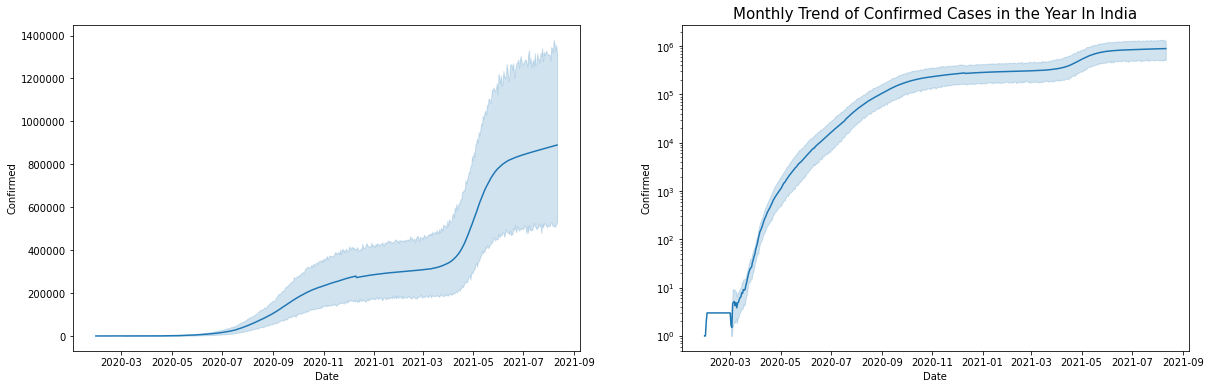

In [308]:
"""Line plot of number of confirmed cases by month of year (linear & log scale)"""
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20,6))

lineplot = sns.lineplot(x=df_India['Date'], y=df_India['Confirmed'], ax=ax[0])
lineplot.set_yticklabels(labels=(lineplot.get_yticks()*1).astype(int))
plt.title('Monthly Trend of Confirmed Cases in the Year In India',size=15)
plt.yscale('linear')

lineplot = sns.lineplot(x=df_India['Date'], y=df_India['Confirmed'], ax=ax[1])
lineplot.set_yticklabels(labels=(lineplot.get_yticks()*1).astype(int))
fig.set_facecolor('white')
plt.title('Monthly Trend of Confirmed Cases in the Year In India',size=15)
plt.yscale('log')
plt.show()

- <b> Type of Plot </b>: Box PLot
-  <b> Reason </b>:  Box plot is useful for visualizing the distribution of a dataset by displaying the median, quartiles, and outliers. In the case of visualizing `Confirmed` by Month of Year in India, a box plot can help us see how the number of confirmed cases varies from month to month and whether there are any significant outliers. This can be particularly useful in identifying any patterns or trends in the data, such as whether there are certain months with consistently higher or lower numbers of confirmed cases. Additionally, a box plot can provide a clearer picture of the spread of the data compared to a line plot, which only shows the overall trend.

In [309]:
"""Get the data for each month of year"""
df_month = df_India.iloc[df_India['Date'].argmax():]
df_month['Date'] = pd.to_datetime(df_month['Date'])
df_month = df_month.append(df_India[(df_India['Date'] + pd.Timedelta(days=1)).dt.day == 1])
df_month.sort_values('Date')

/var/folders/5v/ylqqgnyx0bx4rblw32tgr5f40000gn/T/ipykernel_3806/2761654937.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/5v/ylqqgnyx0bx4rblw32tgr5f40000gn/T/ipykernel_3806/2761654937.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active
1,2020-01-31,Kerala,0,0,1,1
30,2020-02-29,Kerala,0,0,3,3
510,2020-03-31,Himachal Pradesh,0,1,3,2
526,2020-03-31,Uttar Pradesh,14,0,101,87
525,2020-03-31,Uttarakhand,2,0,7,5
...,...,...,...,...,...,...
18096,2021-08-11,Meghalaya,64157,1185,69769,4427
18095,2021-08-11,Manipur,96776,1664,105424,6984
18094,2021-08-11,Maharashtra,6159676,134201,6363442,69565
18092,2021-08-11,Lakshadweep,10165,51,10263,47


/var/folders/5v/ylqqgnyx0bx4rblw32tgr5f40000gn/T/ipykernel_3806/3085690879.py:6: UserWarning:

FixedFormatter should only be used together with FixedLocator



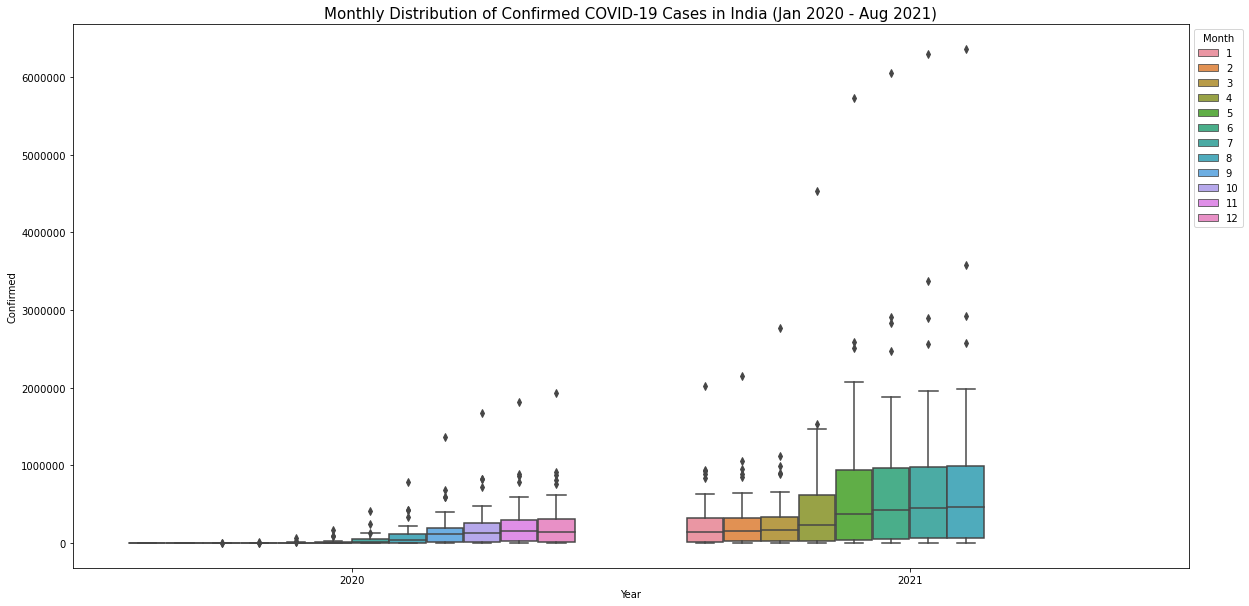

In [310]:
"""Box plot of number of confirmed cases by month of year"""

fig, ax = plt.subplots(figsize=(20, 10))

boxplot = sns.boxplot(x=df_month['Date'].dt.year, y=df_month['Confirmed'],hue=df_month['Date'].dt.month, ax=ax)
boxplot.set_yticklabels(labels=(boxplot.get_yticks()*1).astype(int))

ax.legend(title='Month', bbox_to_anchor=(1, 1), loc='upper left')
ax.set(xlabel='Year')
fig.set_facecolor('white')
plt.title('Monthly Distribution of Confirmed COVID-19 Cases in India (Jan 2020 - Aug 2021)',size=15)
plt.show()

#### Conclusion: 
- From the line plot of `Confirmed` by Month of Year in India, we can observe that:     
    - The number of confirmed cases in India started to increase significantly from March 2020, which is also the month when the first national lockdown was imposed. 
    - The number of cases peaked in September 2020, followed by a steady decline in the subsequent months. 
    - However, there was a sharp increase in confirmed cases again from March 2021, which is attributed to the second wave of COVID-19 in India which ended in June 2021 (the line is much significantly steeper). 
    - The data also indicates that there is a seasonal pattern to the confirmed cases, with a peak during the monsoon season (June-September) and a decline during winter months (November-February).
- From the box plot of `Confirmed` by Month of Year in India, we can observe the following:
    - The median value of confirmed cases increases steadily from April to September and then starts decreasing.
    - The range of confirmed cases gradually increases from April to September and then decreases from October to December.
    - The box plot also reveals the presence of a few extreme values (outliers) in the data, which may have a significant impact on the overall distribution of the data.

### Death Cases by Month of Year

- <b> Type of Plot </b>: Line PLot
-  <b> Reason </b>: In the case of `Deaths` by Month of Year in India, a line plot can be used to show how the number of deaths due to COVID-19 has changed over the months. The line plot can help identify if there is a significant increase or decrease in the number of deaths over time and whether there are any seasonal patterns.

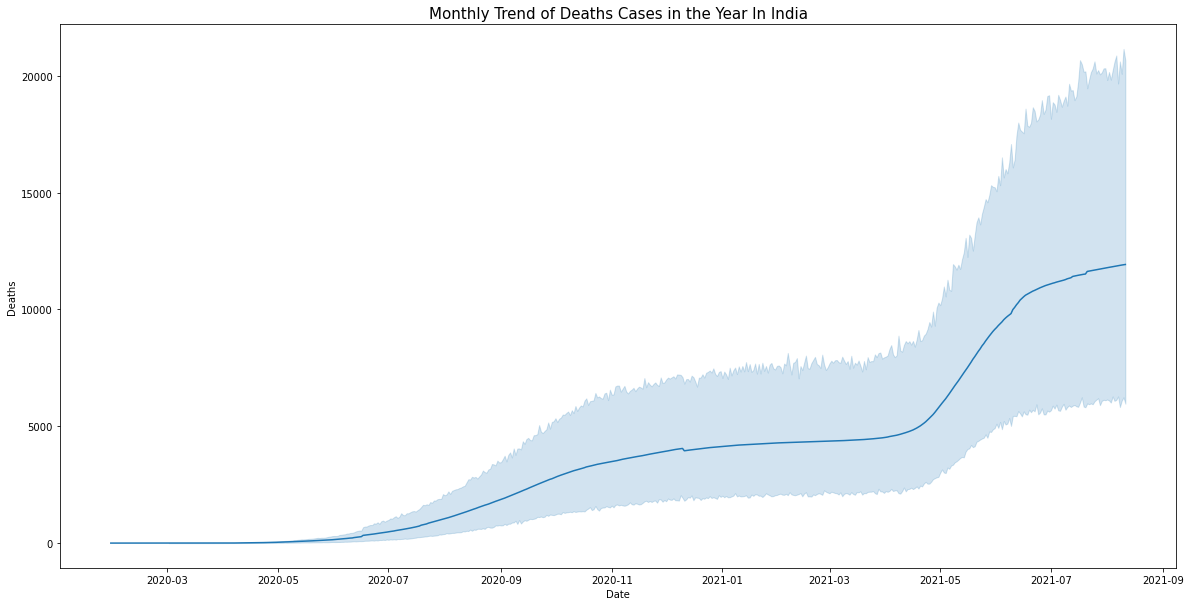

In [311]:
"""Line plot of number of death cases by month of year"""
fig, ax = plt.subplots(figsize=(20, 10))

sns.lineplot(x=df_India['Date'], y=df_India['Deaths'], ax=ax)
fig.set_facecolor('white')
plt.title('Monthly Trend of Deaths Cases in the Year In India',size=15)
plt.show()

#### Conclusion: 
- Based on the line plot of `Deaths` by Month of Year in India, we can observe the following:
    - The number of deaths due to COVID-19 started to increase considerably from April 2021, peaking in May 2021 and declining gradually since then.
    - Before April 2021, the number of deaths remained relatively low and showed only small fluctuations.
    - The overall trend shows a steady increase in the number of deaths over time, with a sudden surge in April-May 2021 due to the second wave of COVID-19 in India.

### Cured Cases by Month of Year

- <b> Type of Plot </b>: Line PLot
-  <b> Reason </b>: In the case of `Cured` by Month of Year in India, a line plot can help us observe how the number of cured cases changes over the months in India, whether the trend is increasing, decreasing, or stable. It can also reveal any sudden spikes or dips in the cured cases. Therefore, a line plot is an effective way for visualizing the trend of `Cured` cases by month of the year in India.

/var/folders/5v/ylqqgnyx0bx4rblw32tgr5f40000gn/T/ipykernel_3806/3438112163.py:5: UserWarning:

FixedFormatter should only be used together with FixedLocator



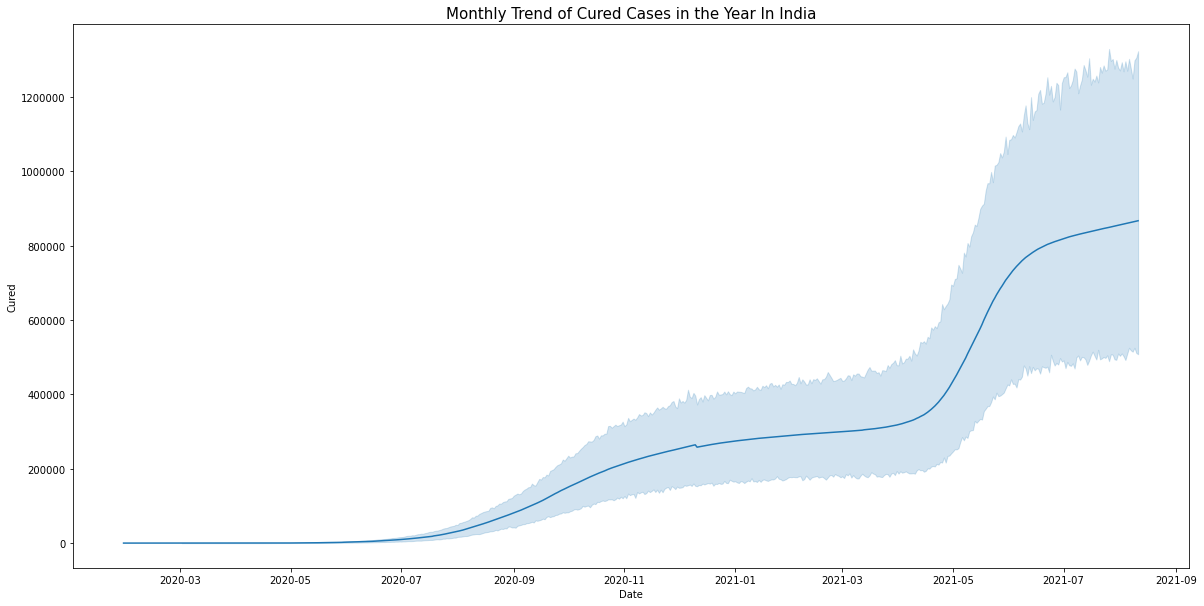

In [312]:
"""Line plot of number of cured cases by month of year"""
fig, ax = plt.subplots(figsize=(20, 10))

lineplot = sns.lineplot(x=df_India['Date'], y=df_India['Cured'], ax=ax)
lineplot.set_yticklabels(labels=(lineplot.get_yticks()*1).astype(int))

fig.set_facecolor('white')
plt.title('Monthly Trend of Cured Cases in the Year In India',size=15)
plt.show()

#### Conclusion: 
- The line plot of `Cured` by Month of Year in India shows that the number of cured cases has been increasing steadily since the beginning of the pandemic. There are some fluctuations in the number of cured cases, but the overall trend is positive.

- The month of September 2020 saw a significant increase in the number of cured cases, which continued until December 2020. The number of cured cases dropped slightly in January and February 2021, but it picked up again in March 2021.

- The line plot also shows that the number of cured cases has been consistently higher than the number of deaths. This is a positive sign and indicates that the healthcare system in India has been able to provide effective treatment to COVID-19 patients. Overall, the line plot of 'Cured' by Month of Year in India provides a positive outlook on the situation of the pandemic in the country.

### Confirmed Cases By State/UnionTerritory

- <b> Type of Plot </b>: Bar PLot
-  <b> Reason </b>: A bar plot is often used to visualize the distribution of a categorical variable. In this case, the `State/UnionTerritory` column contains categorical data, and the number of confirmed cases can be viewed as the frequency of each category. By using a bar plot, we can quickly and easily compare the number of confirmed cases for each `State/UnionTerritory` and identify the top states with the highest number of cases. It can also provide an overview of the overall spread of the virus across different regions of the country.

/var/folders/5v/ylqqgnyx0bx4rblw32tgr5f40000gn/T/ipykernel_3806/3852697616.py:5: UserWarning:

FixedFormatter should only be used together with FixedLocator



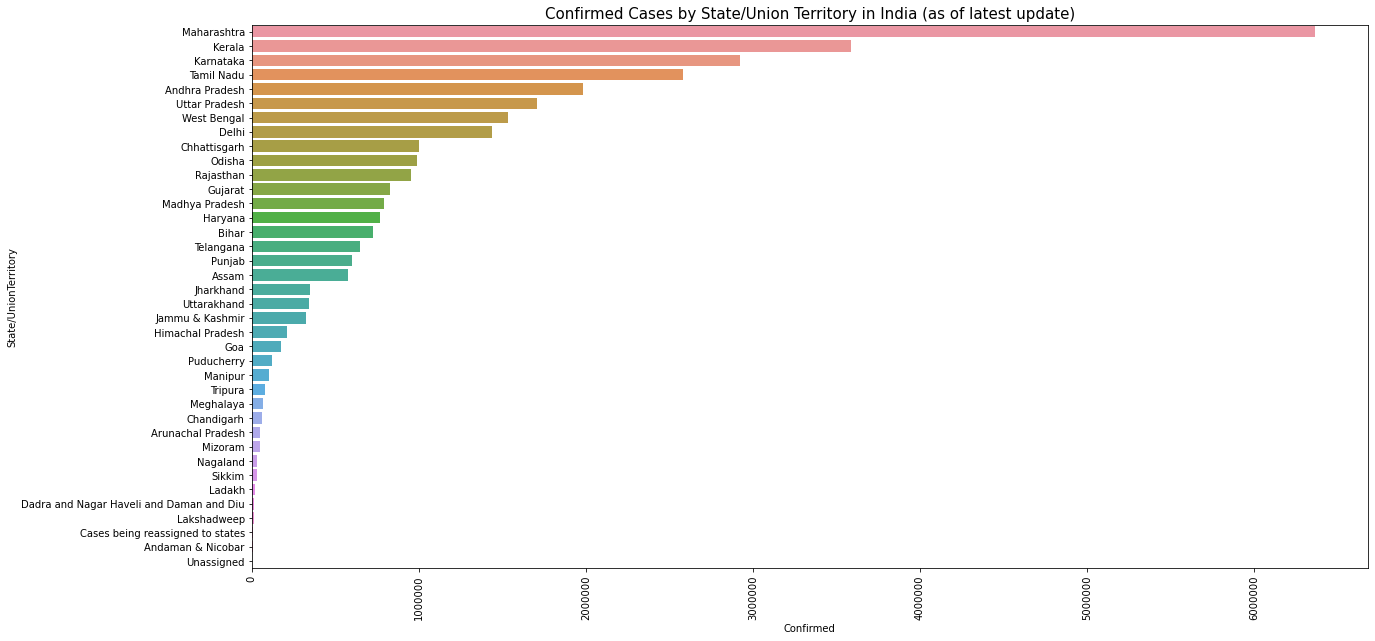

In [313]:
"""Bar plot of number of confirmed cases by Sate/UnionTerritory"""
fig, ax = plt.subplots(figsize=(20, 10))
data_confirmed = df_India.groupby(['State/UnionTerritory'],as_index=False)['Confirmed'].max().sort_values(['Confirmed'],ascending=False)
barplot = sns.barplot(x='Confirmed', y='State/UnionTerritory',data=data_confirmed, ax=ax)
barplot.set_xticklabels(labels=(barplot.get_xticks()*1).astype(int))
fig.set_facecolor('white')
plt.title('Confirmed Cases by State/Union Territory in India (as of latest update)',size=15)
plt.xticks(rotation=90)
plt.show()

- <b> Type of Plot </b>: Pie, Violin PLot
-  <b> Reason </b>: 
    - A pie plot can be used to visualize the proportion of confirmed cases in each of the top 10 states with the highest number of confirmed cases. This can help to quickly see the distribution of cases among these states and identify which states have the highest proportion of cases.
    - A violin plot can be used to visualize the distribution of confirmed cases in each of the top 10 states with the highest number of confirmed cases. This can provide insights into the spread and concentration of cases in each state and identify any potential outliers or variations in the distribution.

In [314]:
"""Top 10 State/UnionTerritory With Most Confirmed cases"""
df_confirmed_10_state = df_India.groupby(['State/UnionTerritory'])['Confirmed'].max().sort_values(ascending=False).reset_index().nlargest(10,['Confirmed'])
n_confirmed_10_state = df_confirmed_10_state['Confirmed'].sum()
df_confirmed_10_state

,State/UnionTerritory,Confirmed
0,Maharashtra,6363442
1,Kerala,3586693
2,Karnataka,2921049
3,Tamil Nadu,2579130
4,Andhra Pradesh,1985182
5,Uttar Pradesh,1708812
6,West Bengal,1534999
7,Delhi,1436852
8,Chhattisgarh,1003356
9,Odisha,988997


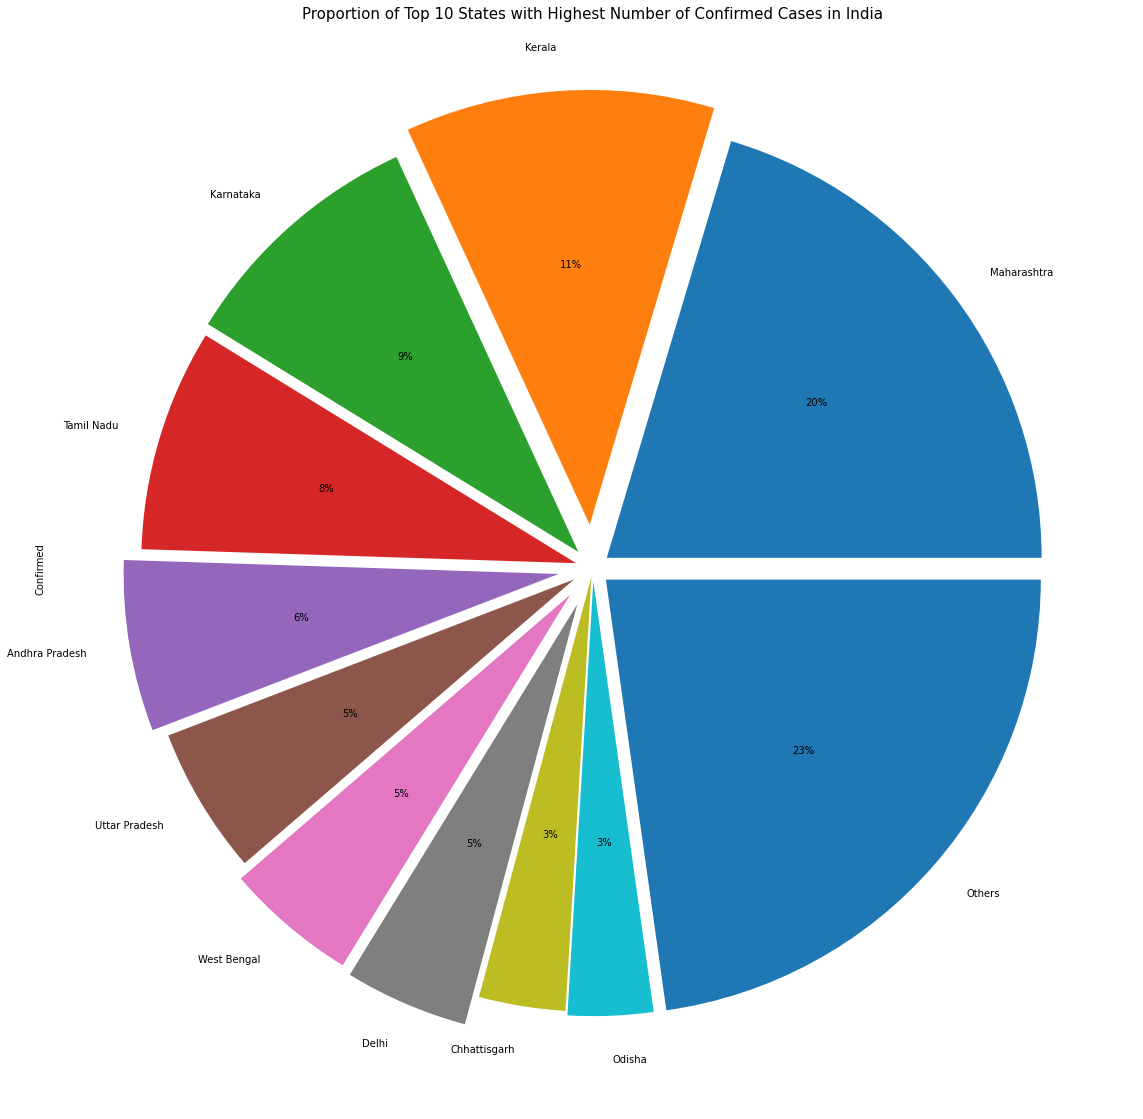

In [315]:
"""Pie plot of top 10 states with the highest number of confirmed cases"""
fig, ax = plt.subplots(figsize=(20, 20))
df_confirmed_state = df_confirmed_10_state
n_confirmed = df_India.groupby(['State/UnionTerritory'])['Cured'].max().sort_values(ascending=False).sum()
df_confirmed_state.loc[10] = ['Others',n_confirmed - n_confirmed_10_state]
df_confirmed_state.set_index('State/UnionTerritory')['Confirmed'].astype('int64').plot(kind='pie',explode=(0.04,0.1,0.05,0.04,0.08,0.05,0.08,0.09,0.02,0.03,0.04),autopct='%.0f%%')
plt.title('Proportion of Top 10 States with Highest Number of Confirmed Cases in India',size=15)
fig.set_facecolor('white')
plt.show()

/var/folders/5v/ylqqgnyx0bx4rblw32tgr5f40000gn/T/ipykernel_3806/1407920958.py:5: UserWarning:

FixedFormatter should only be used together with FixedLocator



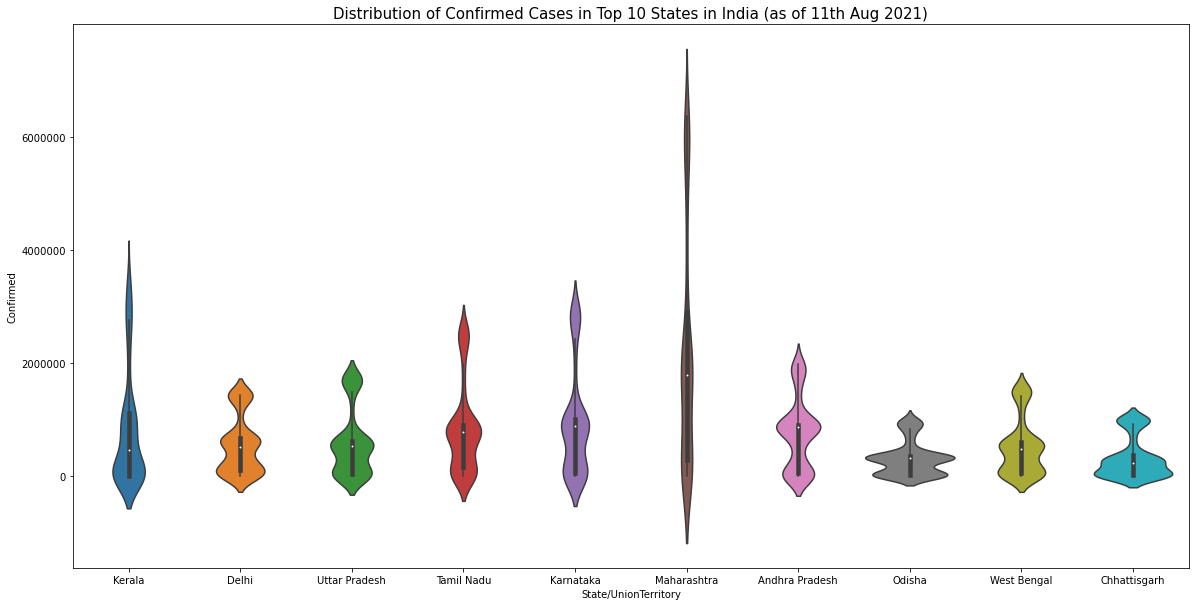

In [316]:
"""Violin plot for top 10 states with the highest number of confirmed cases"""
fig = plt.figure(figsize=(20,10))
data = df_India[df_India['State/UnionTerritory'].isin(df_confirmed_state['State/UnionTerritory'])]
violinplot = sns.violinplot(y = 'Confirmed',x='State/UnionTerritory',data=data)
violinplot.set_yticklabels(labels=(violinplot.get_yticks()*1).astype(int))
plt.title('Distribution of Confirmed Cases in Top 10 States in India (as of 11th Aug 2021)',size=15)
fig.set_facecolor('white')

#### Conclusion: 
- The bar plot of Confirmed Cases By `State/UnionTerritory` provides a clear view of the total number of confirmed cases in each State/UnionTerritory. From the plot, we can observe that Maharashtra had the highest number of confirmed cases, followed by Kerala and Karnataka, while Andaman & Nicobar witnessed the lowest number of confirmed cases. The plot also highlights the significant differences in the number of confirmed cases between different states. It can be seen that the top 10 states account for the majority of the confirmed cases in India, and there is a significant gap between the number of confirmed cases in the top 3 states and the rest of the states.
- From the pie plot, it is evident that Maharashtra has the highest number of confirmed cases, contributing to about 20% of the total confirmed cases in India. The other top states include Kerala, Karnataka, Tamil Nadu, Andhra Pradesh, Uttar Pradesh, West Bengal, Delhi, Chhattisgarh, and Odisha. These top 10 states contribute to more than 75% of the total confirmed cases in India.
- Looking at the violin plot, we can see that Maharashtra has the widest distribution, indicating that it has the highest range of confirmed cases among the top 10 states. Karnataka, Tamil Nadu, and Kerala also have relatively wide distributions, indicating that they have a high range of confirmed cases as well. On the other hand, states like Andhra Pradesh, Uttar Pradesh, and West Bengal have narrower distributions, indicating that they have a more limited range of confirmed cases. However, we can see that even in these states, there are still significant numbers of confirmed cases.

### Death Cases By State/UnionTerritory

- <b> Type of Plot </b>: Bar PLot
-  <b> Reason </b>: A bar plot is a suitable choice for visualizing the number of deaths cases by `State/UnionTerritory` in India as the data is categorical and we want to compare the counts of deaths across different states/territories. The height of each bar represents the count of deaths for the corresponding state/territory, making it easy to compare and rank the different categories.

/var/folders/5v/ylqqgnyx0bx4rblw32tgr5f40000gn/T/ipykernel_3806/1729840290.py:5: UserWarning:

FixedFormatter should only be used together with FixedLocator



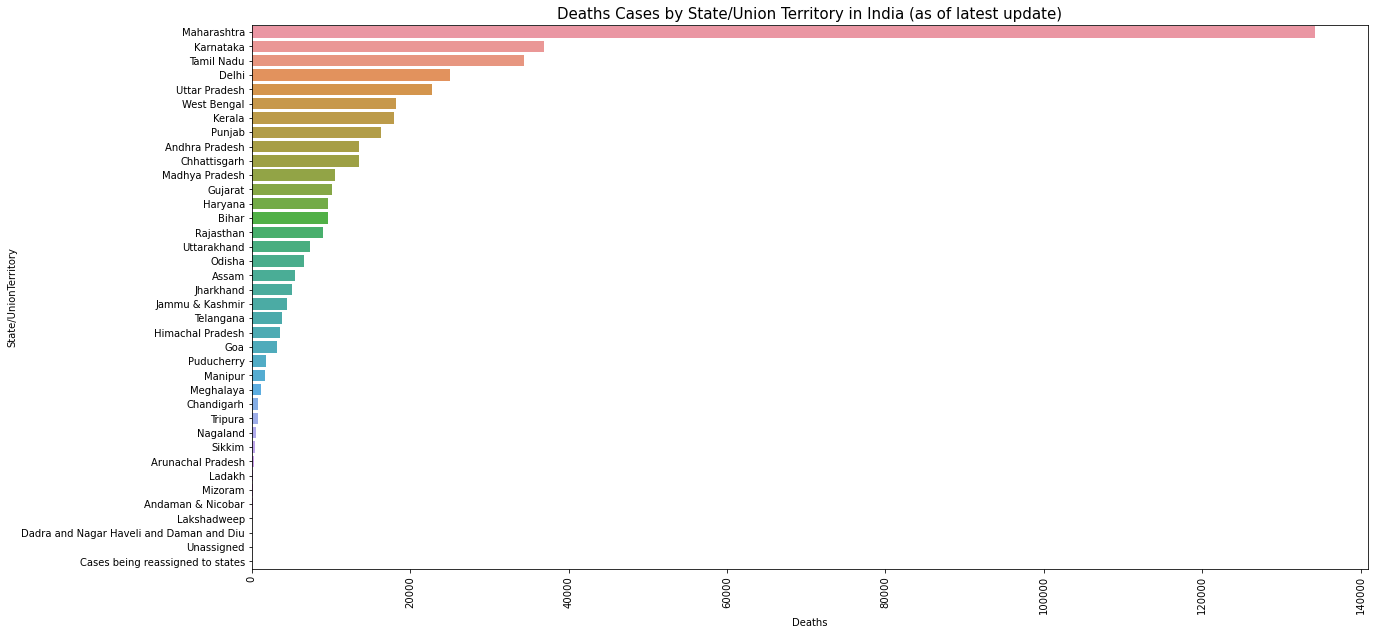

In [317]:
"""Bar plot of number of deaths cases by Sate/UnionTerritory """
fig, ax = plt.subplots(figsize=(20, 10))
data_deaths = df_India.groupby(['State/UnionTerritory'],as_index=False)['Deaths'].max().sort_values(['Deaths'],ascending=False)
barplot = sns.barplot(x='Deaths', y='State/UnionTerritory',data=data_deaths, ax=ax)
barplot.set_xticklabels(labels=(barplot.get_xticks()*1).astype(int))
fig.set_facecolor('white')
plt.xticks(rotation=90)
plt.title('Deaths Cases by State/Union Territory in India (as of latest update)',size=15)
plt.show()

- <b> Type of Plot </b>: Pie, Violin PLot
-  <b> Reason </b>: 
    - A pie chart is often used to show the proportion or percentage of each category in a dataset. In the case of the top 10 states with the highest number of deaths cases, a pie chart can be used to show the percentage of deaths in each state, allowing for easy comparison between the states.
    - A violin plot is often used to visualize the distribution and density of a dataset. In the case of the top 10 states with the highest number of deaths cases, a violin plot can be used to compare the distribution of deaths across the states, providing a more detailed view of the data than a simple bar chart.

In [318]:
"""Top 10 State/UnionTerritory With Most Death cases"""
df_death_10_state = df_India.groupby(['State/UnionTerritory'])['Deaths'].max().sort_values(ascending=False).reset_index().nlargest(10,['Deaths'])
n_death_10_state = df_death_10_state['Deaths'].sum()
df_death_10_state

,State/UnionTerritory,Deaths
0,Maharashtra,134201
1,Karnataka,36848
2,Tamil Nadu,34367
3,Delhi,25068
4,Uttar Pradesh,22775
5,West Bengal,18252
6,Kerala,18004
7,Punjab,16322
8,Andhra Pradesh,13564
9,Chhattisgarh,13544


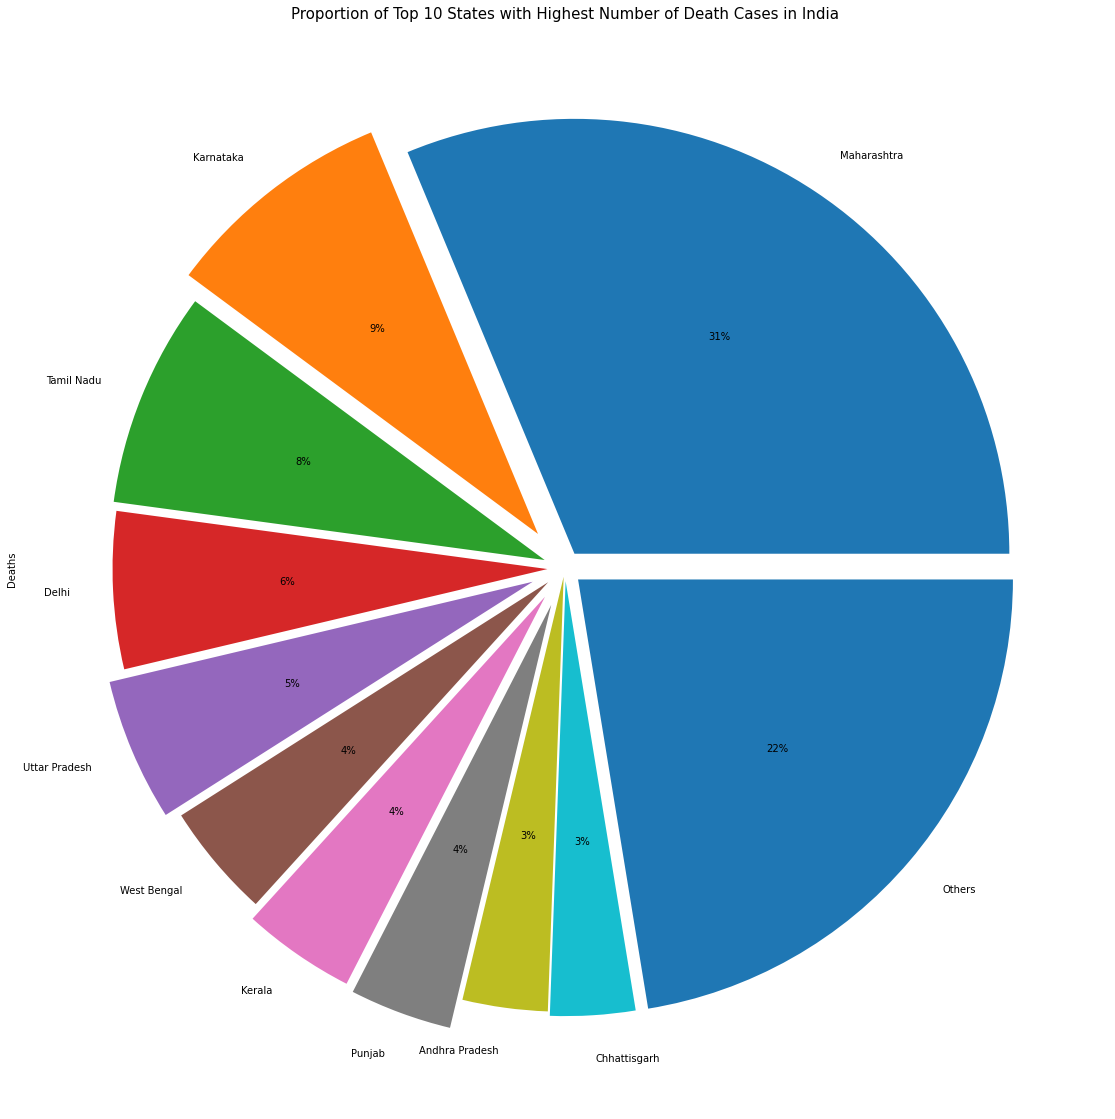

In [319]:
"""Pie plot of top 10 states with the highest number of death cases"""
fig, ax = plt.subplots(figsize=(20, 20))
df_death_state = df_death_10_state
n_deaths = df_India.groupby(['State/UnionTerritory'])['Deaths'].max().sort_values(ascending=False).sum()
df_death_state.loc[10] = ['Others',n_deaths - n_death_10_state]
df_death_state.set_index('State/UnionTerritory')['Deaths'].astype('int64').plot(kind='pie',explode=(0.04,0.1,0.05,0.04,0.08,0.05,0.08,0.09,0.02,0.03,0.04),autopct='%.0f%%')
fig.set_facecolor('white')
plt.title('Proportion of Top 10 States with Highest Number of Death Cases in India',size=15)
plt.show()

/var/folders/5v/ylqqgnyx0bx4rblw32tgr5f40000gn/T/ipykernel_3806/572149459.py:5: UserWarning:

FixedFormatter should only be used together with FixedLocator



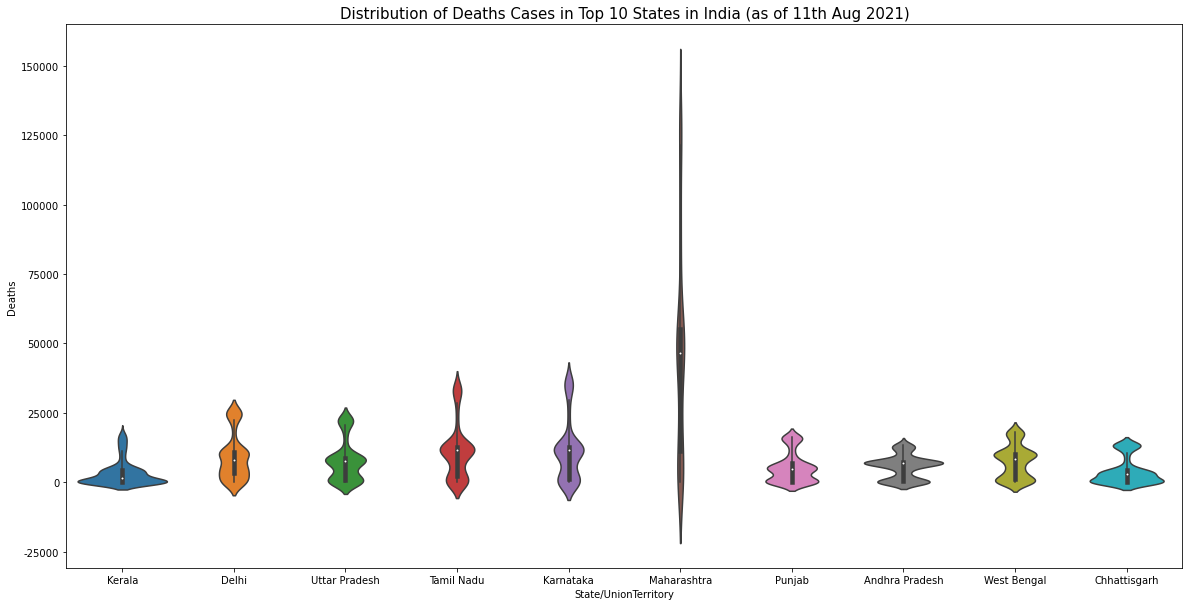

In [320]:
"""Violin plot for top 10 states with the highest number of death cases"""
fig = plt.figure(figsize=(20,10))
data = df_India[df_India['State/UnionTerritory'].isin(df_death_state['State/UnionTerritory'])]
violinplot = sns.violinplot(y = 'Deaths', x='State/UnionTerritory',data=data)
violinplot.set_yticklabels(labels=(violinplot.get_yticks()*1).astype(int))
plt.title('Distribution of Deaths Cases in Top 10 States in India (as of 11th Aug 2021)',size=15)
fig.set_facecolor('white')

#### Conclusion: 
- The bar plot of Deaths Cases By `State/Union Territory` shows the number of deaths recorded in each state/union territory due to COVID-19. From the plot, it is evident that Maharashtra has the highest number of deaths, followed by Karnataka and Tamil Nadu. The top 5 states account for more than 50% of the total deaths in India due to COVID-19. However, there are a few states with a low number of deaths, such as Mizoram and Andaman and Nicobar Islands, indicating better management of the pandemic in those regions.
- Using a pie plot, we can observe that Maharashtra has the highest proportion of deaths among the top 10 states, accounting for around 31% of the total deaths in India. The next two states with the highest proportions of deaths are Karnataka (9%) and Tamil Nadu (8%). The remaining states in the top 10 have relatively smaller proportions of deaths, ranging from around 3% to 6%.
- Using a violin plot to compare the distribution of deaths cases among the top 10 states in India provides some critical observations:
    - Firstly, the plot shows that Maharashtra has the highest number of deaths, followed by Karnataka and Tamil Nadu. The distribution for Maharashtra is heavily skewed towards higher values, indicating that the state has been severely impacted by the pandemic. Karnataka and Tamil Nadu also have a large number of deaths, but the distribution is not as heavily skewed.
    - Secondly, the plot shows that some states such as Kerala and Chhattisgarh have a relatively low median number of deaths, indicating that the pandemic has not impacted them as much severely as some other states.

### Cured Cases By State/UnionTerritory

- <b> Type of Plot </b>: Bar PLot
-  <b> Reason </b>: A bar plot is a suitable visualization for the number of cured cases by `State/Union Territory` because it allows easy comparison of the cured cases across different states/union territories. Each bar represents a state/union territory, and the height of the bar represents the number of cured cases. It is easy to compare the height of bars and identify which states/union territories have a higher or lower number of cured cases. Additionally, bar plots can be sorted by the number of cured cases to highlight the states/union territories with the highest number of cured cases, providing a quick visual summary of the data.

/var/folders/5v/ylqqgnyx0bx4rblw32tgr5f40000gn/T/ipykernel_3806/2494812811.py:5: UserWarning:

FixedFormatter should only be used together with FixedLocator



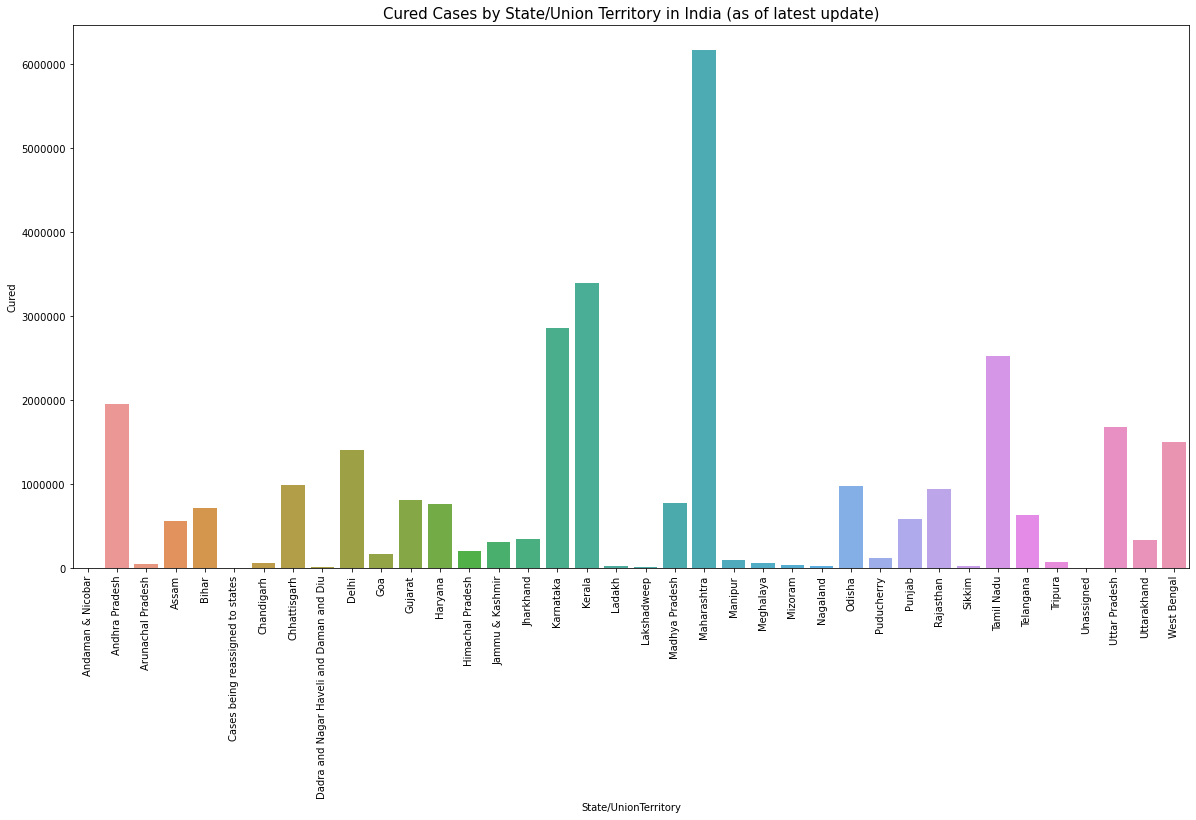

In [321]:
"""Bar plot of number of cured cases by Sate/UnionTerritory """
fig, ax = plt.subplots(figsize=(20, 10))
data_confirmed = df_India.groupby(['State/UnionTerritory'],as_index=False)['Cured'].max()
barplot = sns.barplot(x='State/UnionTerritory', y='Cured',data=data_confirmed, ax=ax)
barplot.set_yticklabels(labels=(barplot.get_yticks()*1).astype(int))
fig.set_facecolor('white')
plt.title('Cured Cases by State/Union Territory in India (as of latest update)',size=15)
plt.xticks(rotation=90)
plt.show()

- <b> Type of Plot </b>: Pie, Violin PLot
-  <b> Reason </b>: 
    - A pie plot can be used to visualize the proportion of the total number of cured cases contributed by each of the top 10 states. This is useful for quickly identifying which states have the highest number of cured cases and the relative contribution of each state to the total number of cured cases.
    - a violin plot could be used to visualize the distribution of cured cases across the top 10 states. It can show the shape, spread, and concentration of the data for each state, allowing for a better comparison of the distribution of cured cases across the states.

In [322]:
"""Top 10 State/UnionTerritory With Highest Cured cases"""
df_cured_10_state = df_India.groupby(['State/UnionTerritory'])['Cured'].max().sort_values(ascending=False).reset_index().nlargest(10,['Cured'])
n_cured_10_state = df_cured_10_state['Cured'].sum()
df_cured_10_state

,State/UnionTerritory,Cured
0,Maharashtra,6159676
1,Kerala,3396184
2,Karnataka,2861499
3,Tamil Nadu,2524400
4,Andhra Pradesh,1952736
5,Uttar Pradesh,1685492
6,West Bengal,1506532
7,Delhi,1411280
8,Chhattisgarh,988189
9,Odisha,972710


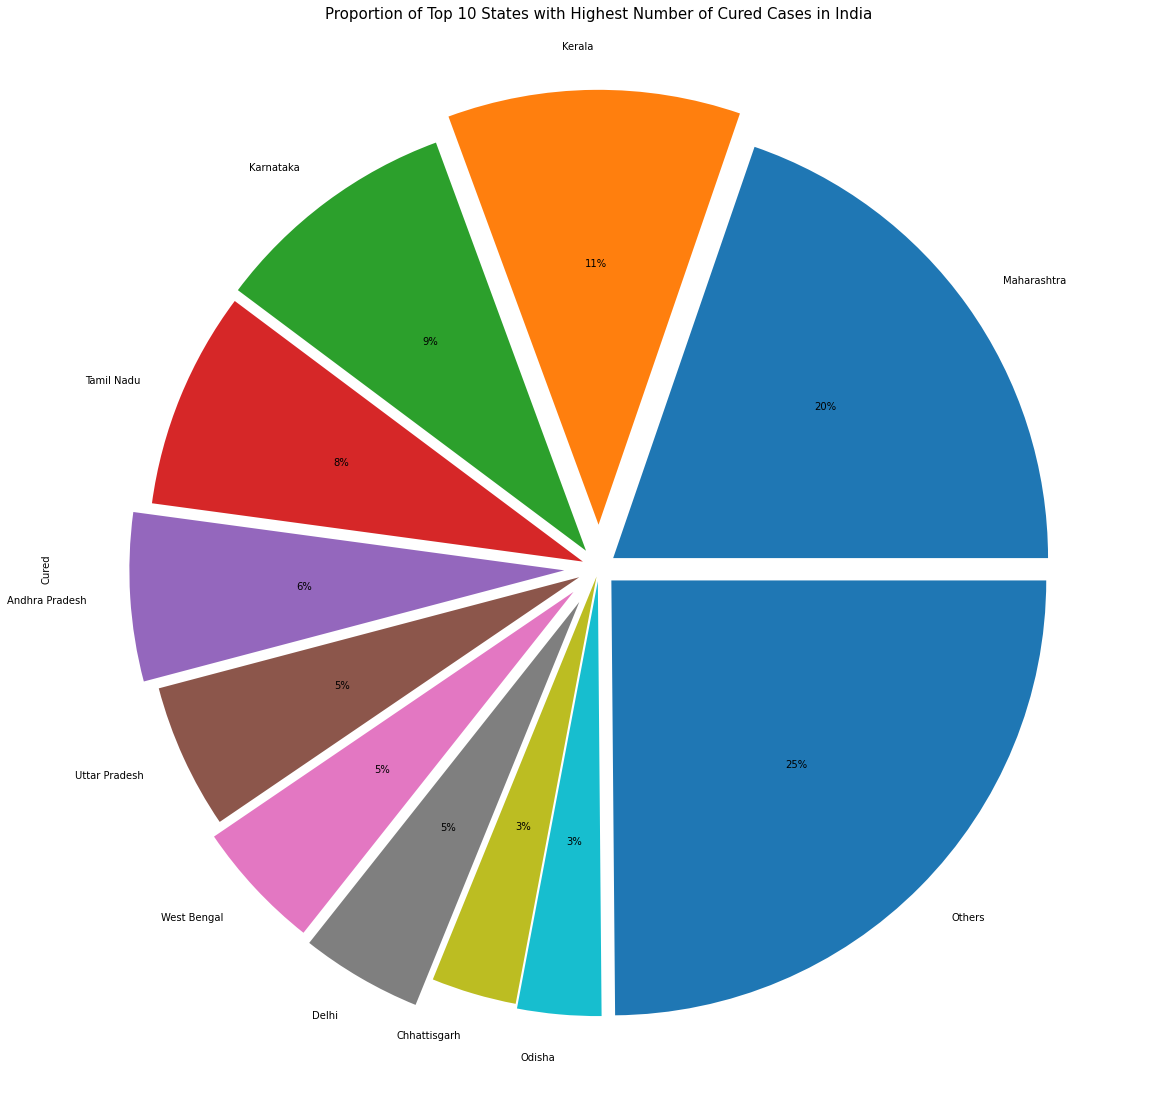

In [323]:
"""Pie plot of top 10 states with the highest number of cured cases"""
fig, ax = plt.subplots(figsize=(20, 20))
df_cured_state = df_cured_10_state
n_cured = df_India.groupby(['State/UnionTerritory'])['Cured'].max().sort_values(ascending=False).sum()
df_cured_state.loc[10] = ['Others',n_cured - n_cured_10_state]
df_cured_state.set_index('State/UnionTerritory')['Cured'].astype('int64').plot(kind='pie',explode=(0.04,0.1,0.05,0.04,0.08,0.05,0.08,0.09,0.02,0.03,0.04),autopct='%.0f%%')
fig.set_facecolor('white')
plt.title('Proportion of Top 10 States with Highest Number of Cured Cases in India',size=15)
plt.show()

/var/folders/5v/ylqqgnyx0bx4rblw32tgr5f40000gn/T/ipykernel_3806/1421189805.py:5: UserWarning:

FixedFormatter should only be used together with FixedLocator



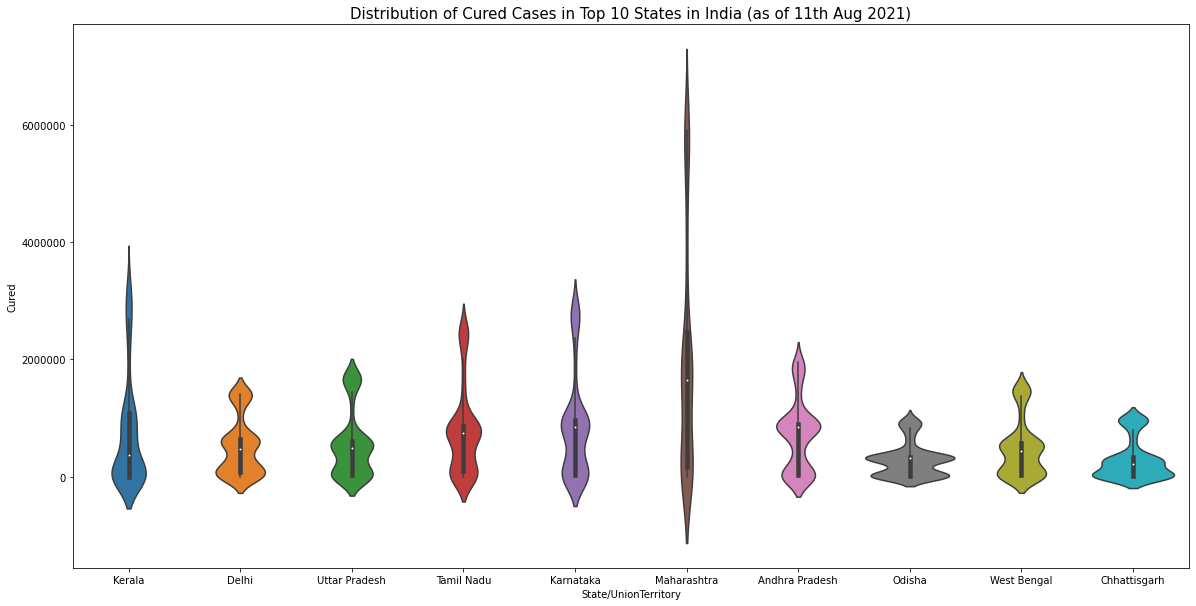

In [324]:
"""Violin plot for top 10 states with the most cured cases"""
fig = plt.figure(figsize=(20,10))
data = df_India[df_India['State/UnionTerritory'].isin(df_cured_state['State/UnionTerritory'])]
violinplot = sns.violinplot(y = 'Cured', x='State/UnionTerritory',data=data)
violinplot.set_yticklabels(labels=(violinplot.get_yticks()*1).astype(int))
plt.title('Distribution of Cured Cases in Top 10 States in India (as of 11th Aug 2021)',size=15)
fig.set_facecolor('white')

#### Conclusion:
- Based on the bar plot of cured cases by `State/UnionTerritory`, we can observe that the top three states with the highest number of cured cases are Maharashtra, Kerala, and Karnataka. These three states have significantly higher numbers of cured cases compared to other states. We can also observe that many other states have similar numbers of cured cases, indicating that the recovery rate is relatively consistent across the country. However, there are some states with significantly lower numbers of cured cases, such as Lakshadweep and Dadra and Nagar Haveli and Daman and Diu.
- The pie chart of the top 10 states with the highest number of cured cases shows that Maharashtra has the highest percentage of cured cases at 20%, followed by Kerala at 11%, and Karnataka at 9%. The rest of the states have a relatively lower percentage of cured cases, with the remaining 7 states having less than 6% each. Overall, these top 10 states account for almost 75% of the total cured cases in India.
- The violin plot of the top 10 states with the highest number of cured cases shows that most of the distributions are positively skewed, indicating that these states have been successful in treating COVID-19 patients. Maharashtra has the highest number of cured cases and the distribution is quite spread out, indicating a higher variability in the number of cured cases across different time periods. Tamil Nadu, Kerala, and Karnataka also have a relatively higher spread of cured cases distribution, while the other states have a more concentrated distribution.

### Confirmed vs Deaths

- <b> Type of Plot </b>: Scatter PLot
-  <b> Reason </b>: A scatter plot is used to visualize the relationship between two variables. In this case, the two variables are `Confirmed` and `Deaths` in the COVID-19 dataset. The scatter plot can help us identify if there is a correlation between the two variables. For example, if there is a positive correlation, we can expect that as the number of confirmed cases increases, the number of deaths will also increase. On the other hand, if there is no correlation, we can expect the points to be scattered randomly.

/var/folders/5v/ylqqgnyx0bx4rblw32tgr5f40000gn/T/ipykernel_3806/2952628137.py:4: UserWarning:

FixedFormatter should only be used together with FixedLocator



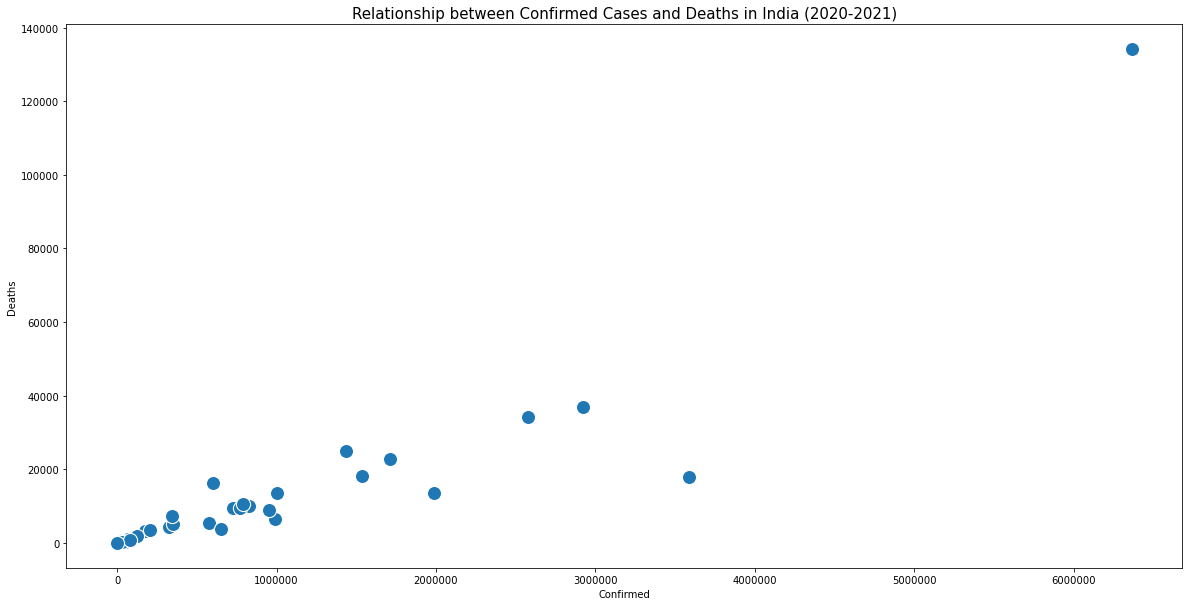

In [325]:
"""Scatter plot of Confirmed vs Deaths"""
fig, ax = plt.subplots(figsize=(20, 10))
scatterplot = sns.scatterplot(x=statewise['Confirmed'],y=statewise['Deaths'],s=200)
scatterplot.set_xticklabels(labels=(scatterplot.get_xticks()*1).astype(int))
plt.title('Relationship between Confirmed Cases and Deaths in India (2020-2021)',size=15)
fig.set_facecolor('white')

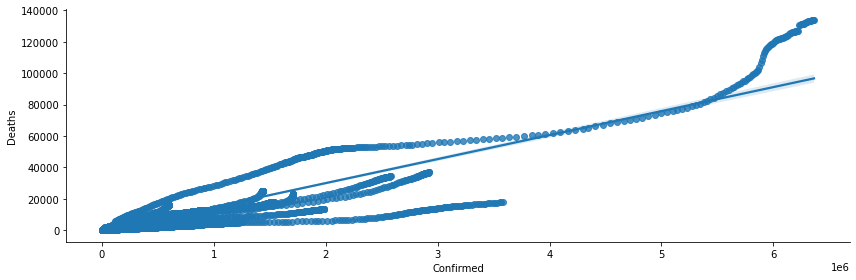

In [326]:
"""Lm plot (Scatter Plot with overlaid regession line) of Confirmed vs Deaths"""
lmplot = sns.lmplot(data=df_India,x='Confirmed',y='Deaths',height=4, aspect=3)

#### Conclusion:
- As we can observe, there is a generally positive correlation between the number of confirmed cases and deaths, which means that as the number of confirmed cases increases, the number of deaths also tends to increase. However, there are some states or union territories that deviate from this trend and have a higher number of deaths than expected based on their confirmed cases or vice versa.

### Confirmed vs Cured

- <b> Type of Plot </b>: Scatter PLot
-  <b> Reason </b>: 
    - A scatter plot can be used to visualize the relationship between two variables. In this case, we are interested in exploring the relationship between the number of confirmed cases and the number of cured cases in different states/union territories of India. A scatter plot can help us to see whether there is any correlation or relationship between the two variables.
    - For example, if we observe that as the number of confirmed cases increases, the number of cured cases also increases, it may suggest that the treatment or management of the disease is improving. On the other hand, if we observe that there is no relationship between the two variables, it may indicate that there are other factors at play that influence the number of cured cases.

/var/folders/5v/ylqqgnyx0bx4rblw32tgr5f40000gn/T/ipykernel_3806/1489121715.py:4: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/5v/ylqqgnyx0bx4rblw32tgr5f40000gn/T/ipykernel_3806/1489121715.py:5: UserWarning:

FixedFormatter should only be used together with FixedLocator



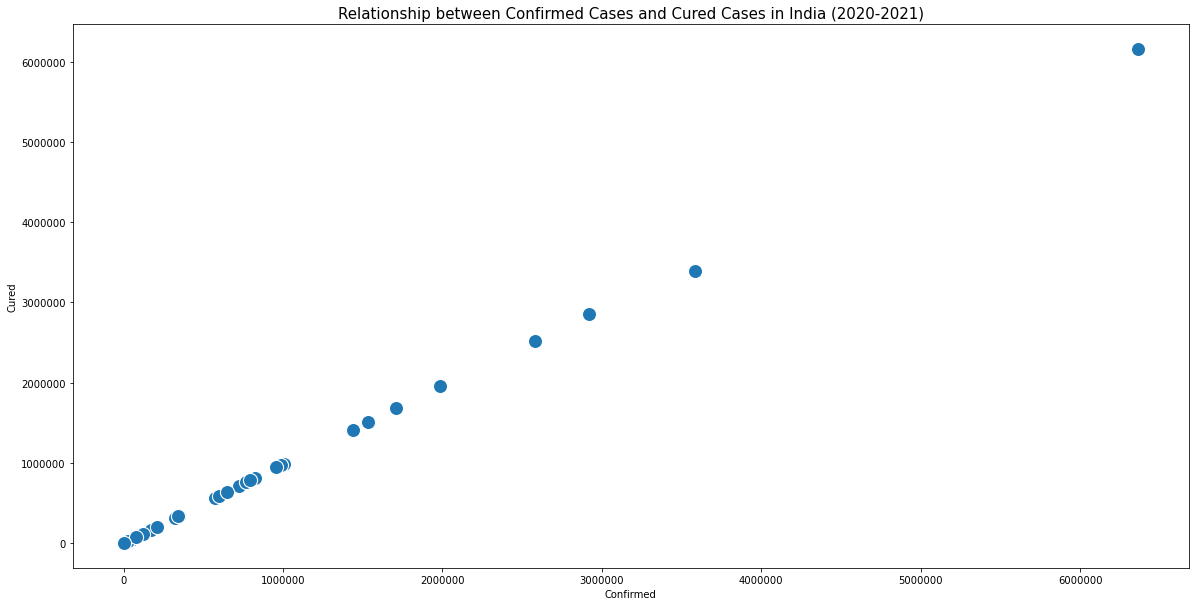

In [327]:
"""Scatter plot of Confirmed vs Cured"""
fig, ax = plt.subplots(figsize=(20, 10))
scatterplot = sns.scatterplot(x=statewise['Confirmed'],y=statewise['Cured'],s=200)
scatterplot.set_xticklabels(labels=(scatterplot.get_xticks()*1).astype(int))
scatterplot.set_yticklabels(labels=(scatterplot.get_yticks()*1).astype(int))
plt.title('Relationship between Confirmed Cases and Cured Cases in India (2020-2021)',size=15)
fig.set_facecolor('white')

- <b> Type of Plot </b>: Scatter PLot
-  <b> Reason </b>: A scatter plot is used to visualize the relationship between two variables. In this case, the two variables are `Confirmed` and `Deaths` in the COVID-19 dataset. The scatter plot can help us identify if there is a correlation between the two variables. For example, if there is a positive correlation, we can expect that as the number of confirmed cases increases, the number of deaths will also increase. On the other hand, if there is no correlation, we can expect the points to be scattered randomly.

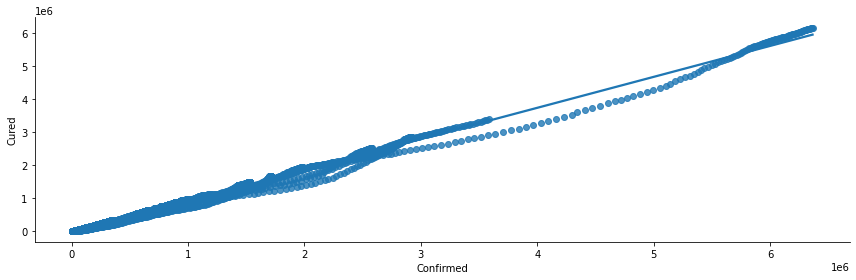

In [328]:
"""Lm plot (Scatter Plot with overlaid regession line) of Confirmed vs Cured"""
lmplot = sns.lmplot(data=df_India,x='Confirmed',y='Cured',height=4, aspect=3)

#### Conclusion:
- As we can observe, there is a strong positive correlation between the two variables. This means that as the number of confirmed cases increases, the number of cured cases also increases. However, it is important to note that the relationship is not perfectly linear, as there are some outliers that deviate from the general trend.
- Overall, despite the challenges and complexities of the COVID-19 pandemic, there have been significant efforts and achievements in mitigating its impact and saving lives through medical treatments and public health measures.

### State/UnionTerritory vs Date

- <b> Type of Plot </b>: Count PLot
-  <b> Reason </b>: A count plot is used to visualize the count of observations in a categorical variable. In the context of `State/UnionTerritory` vs `Date`, a count plot can be used to visualize the number of occurrences of each `State/UnionTerritory` on different dates. This can be useful to understand the frequency of data collection and the completeness of the dataset for different states/union territories over time. It can also be used to identify any gaps in the data collection process or any irregularities in the reporting of cases for different states/union territories.

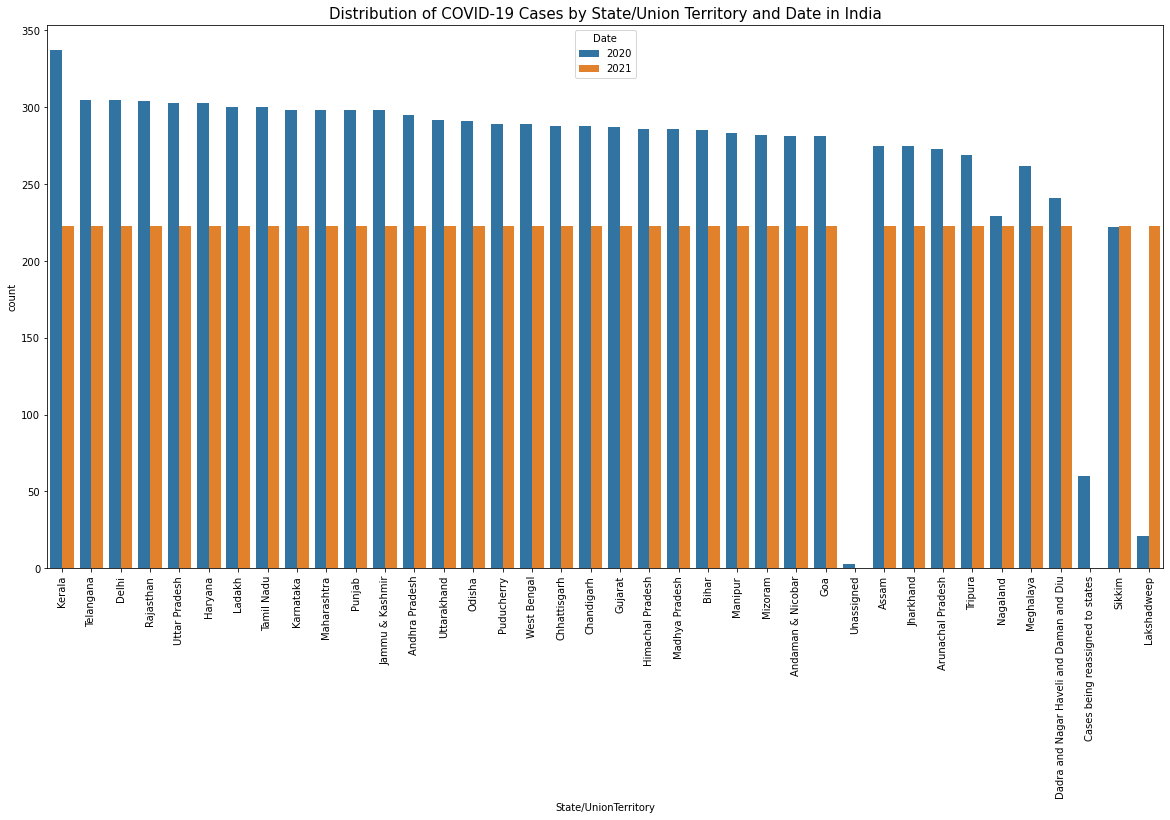

In [329]:
"""Count plot of State/UnionTerritory vs Date"""
fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot(x=df_India['State/UnionTerritory'],hue=df_India.sort_values('Date')['Date'].dt.strftime('%Y'))
plt.tick_params(axis='x', rotation=90)
fig.set_facecolor('white')
plt.title('Distribution of COVID-19 Cases by State/Union Territory and Date in India',size=15)
plt.show()

#### Conclusion:
- Kerala has the highest number of entries in 2020, indicating that Kerala was the state that had been affected by the pandemic earliest since 2020.
- The year 2020 also witnessed Lakshadweep was the last state in which the COVID-19 cases were recored as it had the lowest number of entries, meaning that all states and union territories in the country were affected by the pandemic.
- There is a significant increase in the number of entries for each State/UnionTerritory in 2021 as compared to 2020, indicating that more data has been recorded for each State/UnionTerritory in 2021.

### Additional Analysis

- <b> Type of Plot </b>: Line PLot
-  <b> Reason </b>: The line plot shows the trend of active cases, whether it is increasing, decreasing or remaining stable over time. It can also help to identify any seasonality or patterns in the data. Therefore, a line plot is a suitable visualization technique for showing the trend of active cases over time.

/var/folders/5v/ylqqgnyx0bx4rblw32tgr5f40000gn/T/ipykernel_3806/2122444809.py:4: UserWarning:

FixedFormatter should only be used together with FixedLocator



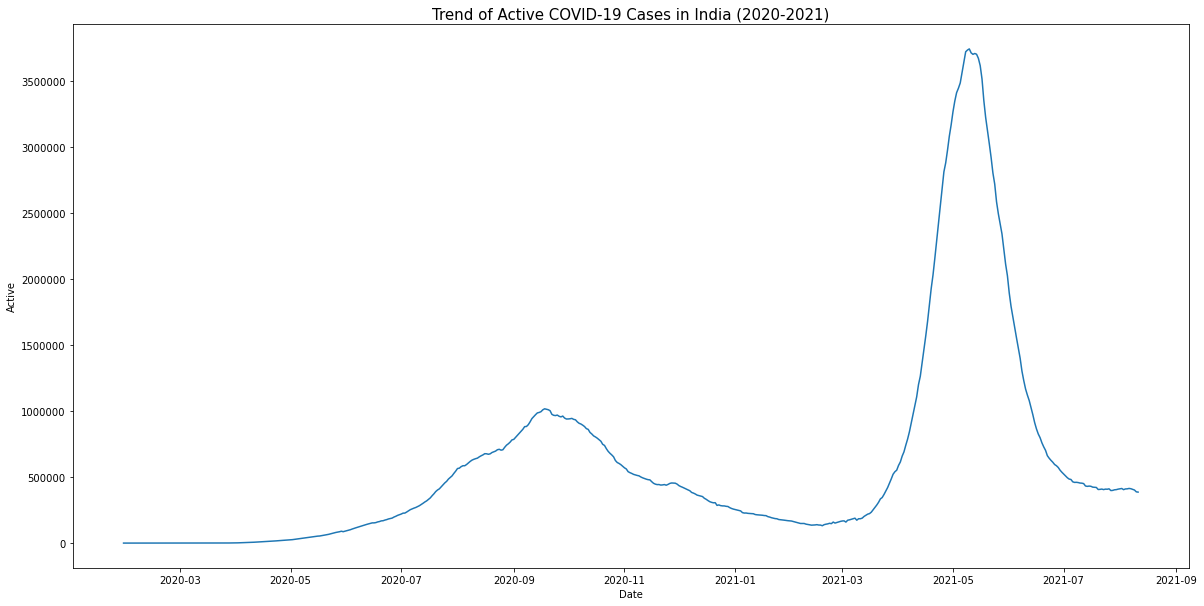

In [330]:
"""Line plot of COVID-19 Active Cases"""
fig = plt.figure(figsize=(20,10))
lineplot = sns.lineplot(x=datewise.index,y=datewise['Active'])
lineplot.set_yticklabels(labels=(lineplot.get_yticks()*1).astype(int))
fig.set_facecolor('white')
plt.title('Trend of Active COVID-19 Cases in India (2020-2021)',size=15)
plt.show()

#### Conclusion: 
- The number of active cases in India started increasing steeply from mid-March 2020 and peaked in mid-September 2020
- After that, it started decreasing gradually and reached the local minimum point in early February 2021 with around 135,000 active cases.
- However, from late February 2021, the number of active cases started increasing sharply and reached a peak of around 3.75 million active cases in May 2021.
- Since then, it has been declining significantly, and as of August 11, 2021, it stands at around 350,000 active cases.
- The line plot shows that the number of active cases fluctuated over time with several peaks and valleys, indicating it is due to the impact of various factors such as lockdowns, vaccination drives, and the emergence of new variants of the virus.

## 5.3. Multivariate Analysis

#### Confirmed , Deaths , Cured

- <b> Type of Plot </b>: Box PLot, Multi-Axis chart
-  <b> Reason </b>: 
    - A box plot is a good way to visualize the distribution of data, especially when comparing multiple variables. In the case of COVID-19 data, the box plot can be used to compare the distribution of confirmed cases, deaths, and cured cases. The box plot provides a quick overview of the range of values, the median, the interquartile range, and any outliers in each variable. By comparing the box plots of these three variables, we can gain insights into the severity of the outbreak and the success of efforts to contain it. For example, if the box plot for confirmed cases is much larger than the box plots for deaths and cured cases, this may indicate a high number of asymptomatic cases or a lack of testing. Conversely, if the box plot for cured cases is much larger than the box plots for confirmed cases and deaths, this may indicate a successful effort to treat and cure those who are infected.
    - Multi-Axis chart can be used for visualizing `Confirmed`, `Deaths`, and `Cured` because it allows us to plot multiple data series with different scales on the same chart, making it easier to compare the trends and relationships between the variables. In this case, `Confirmed`, `Deaths`, and `Cured` are all related to the COVID-19 pandemic, but they are measured in different units and have different scales. By using a Multi-Axis chart, we can plot the three variables on different vertical axes, each with its own scale, and display them on the same chart. This way, we can easily see the relationships between the variables and identify any patterns or trends that may exist

/var/folders/5v/ylqqgnyx0bx4rblw32tgr5f40000gn/T/ipykernel_3806/3829283807.py:4: UserWarning:

FixedFormatter should only be used together with FixedLocator



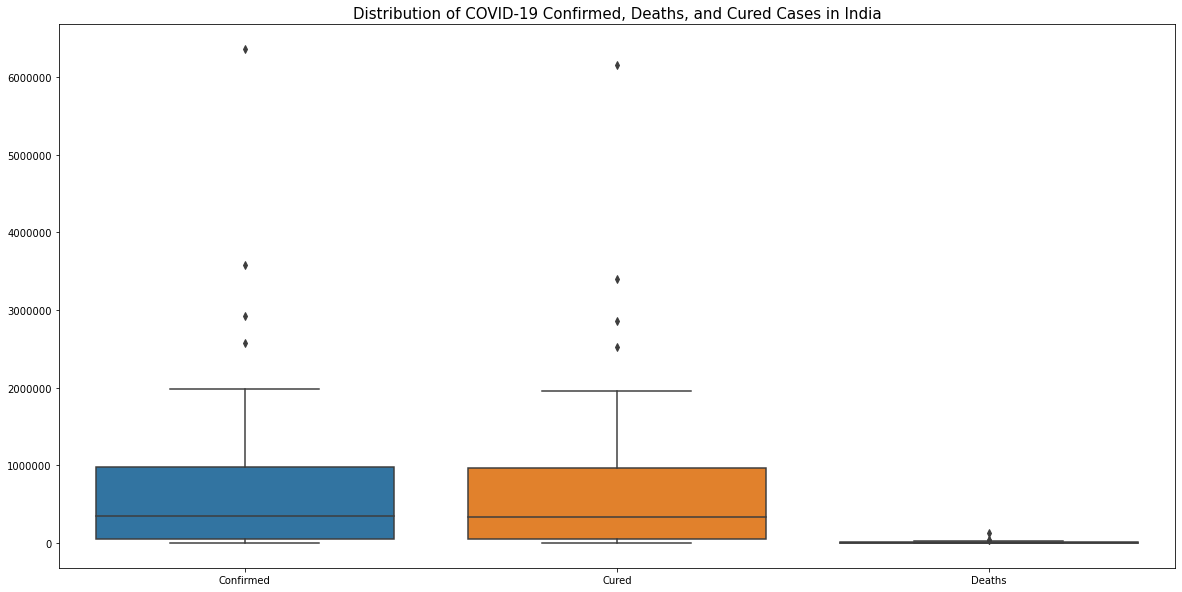

In [331]:
"""Box plot for Confirmed , Deaths , Cured"""
fig = plt.figure(figsize = (20,10))
boxplot = sns.boxplot(data=statewise)
boxplot.set_yticklabels(labels=(boxplot.get_yticks()*1).astype(int))
plt.title('Distribution of COVID-19 Confirmed, Deaths, and Cured Cases in India',size=15)
fig.set_facecolor('white')

/var/folders/5v/ylqqgnyx0bx4rblw32tgr5f40000gn/T/ipykernel_3806/1449122983.py:9: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/5v/ylqqgnyx0bx4rblw32tgr5f40000gn/T/ipykernel_3806/1449122983.py:10: UserWarning:

FixedFormatter should only be used together with FixedLocator



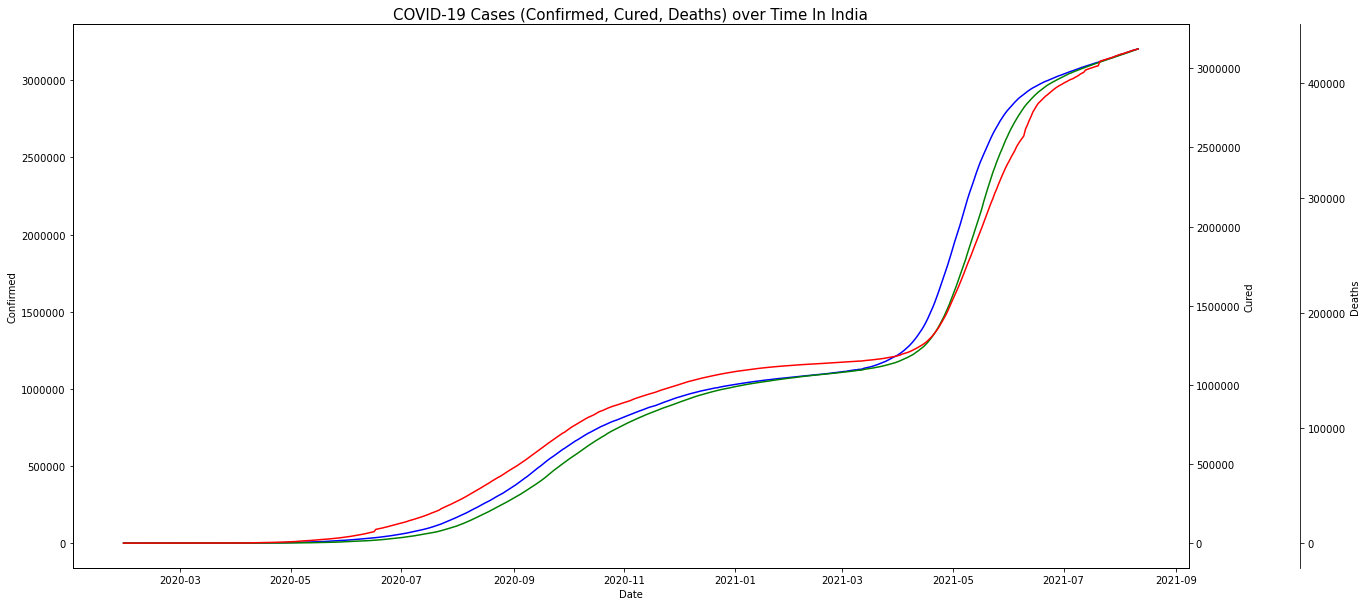

In [332]:
"""Multi-Axis chart for COVID-19 Cases (Confirmed, Cured, Deaths)"""
fig = plt.figure(figsize=(20,10))
ax = sns.lineplot(x=datewise.index,y=datewise['Confirmed'], color='b')
ax2 = ax.twinx()
ax2 = sns.lineplot(x=datewise.index,y=datewise['Cured'],color='g')
ax3 = ax.twinx()
sns.lineplot(x=datewise.index,y=datewise['Deaths'],color='r')
ax3.spines["right"].set_position(("axes", 1.1))
ax.set_yticklabels(labels=(lineplot.get_yticks()*1).astype(int))
ax2.set_yticklabels(labels=(lineplot.get_yticks()*1).astype(int))
ax2.grid(False)
ax3.grid(False)
plt.title('COVID-19 Cases (Confirmed, Cured, Deaths) over Time In India',size=15)
plt.show()

#### Conclusion:
- As we can observe, the box plot shows that:
    - The range of confirmed cases is relatively wide. On the other hand, the range of cured cases is somewhat similar to that of confirmed cases, with relatively fewer outliers. However, the range of death cases is much narrower. 
    - This suggests that while the total number of confirmed cases in India is high, the majority of cases have been cured, in which there is a smaller percentage of confirmed cases resulting in death. Additionally, the plot indicates that the variation in the number of deaths reported among different states is relatively low, whereas the variation in the number of confirmed and cured cases is greater. 
- The box plot indicates that the confirmed cases and cured cases show a similar trend in terms of the general shape of the curve, with both increasing rapidly in the early months of the pandemic, and then gradually leveling off over time. In contrast, the death cases line plot shows a more erratic trend, with sharp increases and decreases over time, likely reflecting fluctuations in the severity of the pandemic in different regions and at different times.

#### Cured, Deaths, Active

- <b> Type of Plot </b>: Donut Chart
-  <b> Reason </b>: In the case of COVID-19, the confirmed cases can be broken down into cured, deaths, and active cases. By using a donut chart, we can quickly see the proportion of each category relative to the total number of confirmed cases. This can help us understand the severity of the situation and the progress of the pandemic. Additionally, the donut chart can be visually appealing and easy to interpret, making it a good choice for presenting data to a non-technical audience.

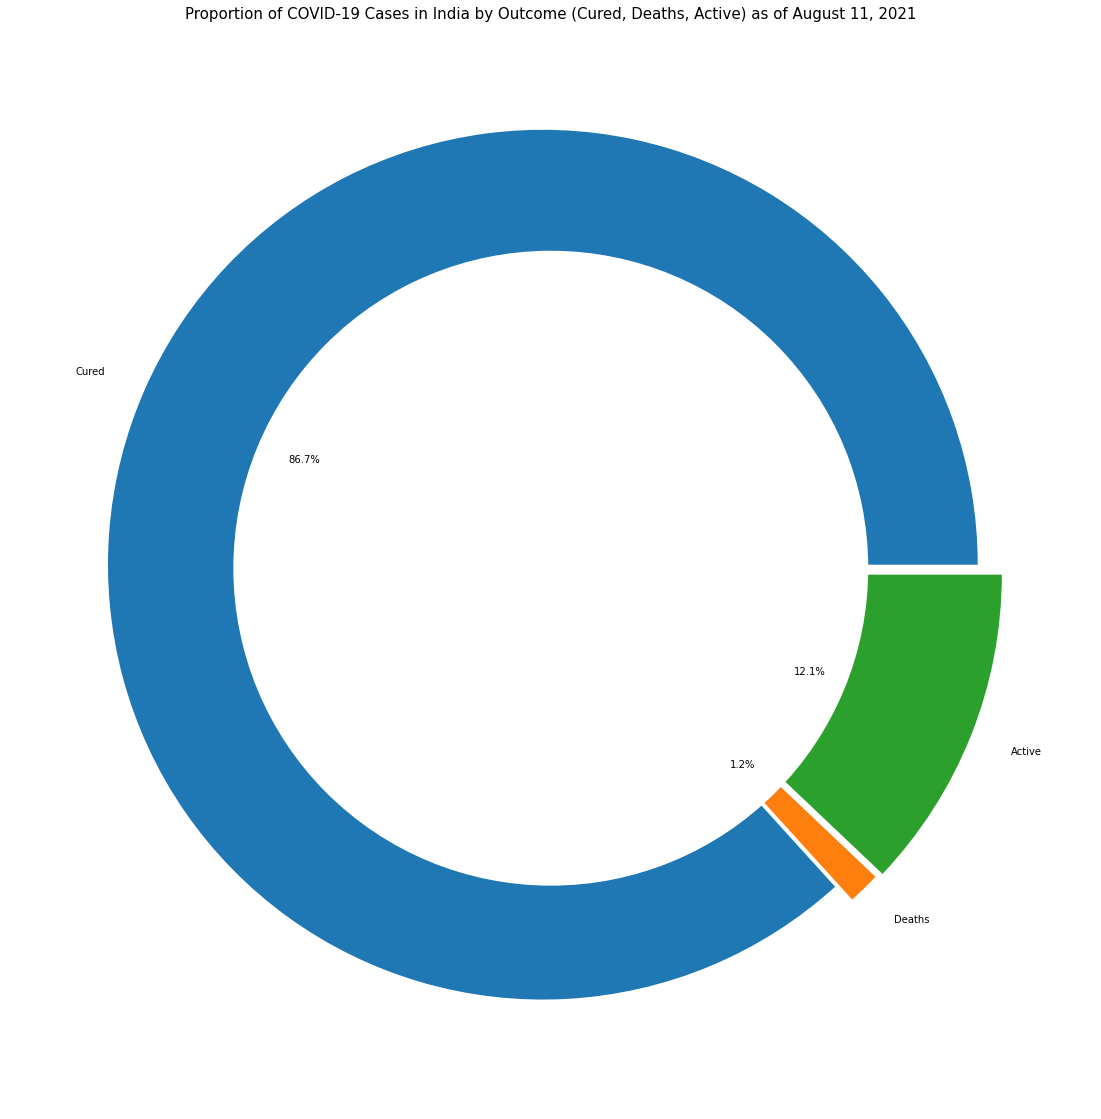

In [333]:
"""Donut chart for cured, deaths, active"""
fig = plt.figure(figsize=(40,20))
confirmed= df_India.groupby(['State/UnionTerritory'])['Confirmed'].max().sum()
deaths= df_India.groupby(['State/UnionTerritory'])['Deaths'].max().sum()
cured = df_India.groupby(['State/UnionTerritory'])['Cured'].max().sum()
active= df_India.groupby(['State/UnionTerritory'])['Active'].max().sum()
plt.pie([cured,deaths,active], labels=['Cured','Deaths','Active'],explode=(0.02,0.03,0.04), autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.73, fc='white')
fig.gca().add_artist(centre_circle)
plt.title('Proportion of COVID-19 Cases in India by Outcome (Cured, Deaths, Active) as of August 11, 2021',size=15)
fig.set_facecolor('white')

#### Conclusion:
- The chart highlights that the majority of cases in India are cured, accounting for 86.7% of total confirmed cases. This is a positive sign and indicates that the healthcare system in India has been successful in treating and curing patients.
- Meanwhile, active cases made up only 12.1%, indicating that the number of new cases is decreasing, and the situation is improving. However, the deaths cases, which represent 1.2%, remain a concern, and efforts should be made to further reduce the mortality rate.

#### CFR (case fatality rate) of States/ Union Territories

- <b> Type of Plot </b>: Point plot
-  <b> Reason </b>: A point plot is used for visualizing the CFR (case fatality rate) of `State/Union Territory` in India because it allows us to compare the means and the confidence intervals of different groups of data, which in this case are the different states/union territories. The point plot shows the mean CFR as a point and the confidence interval as a line. This allows us to easily compare the CFR of different states/union territories and see if there are any significant differences. Additionally, by using a point plot, we can easily see which states/union territories have higher or lower CFRs compared to others, making it a useful tool for identifying areas that may need more attention in terms of healthcare resources and interventions.

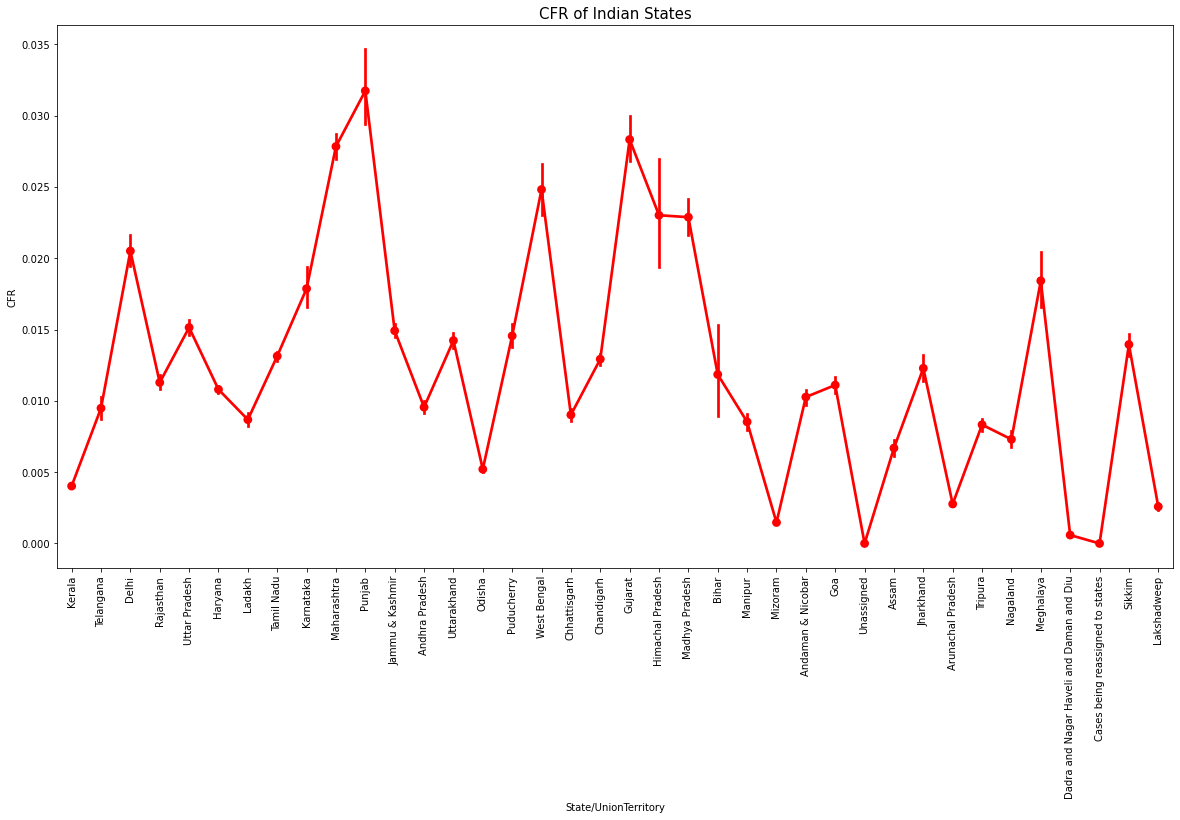

In [334]:
"""Point plot of CFR (case fatality rate) of Indian States"""
df_India['CFR'] = df_India['Deaths']/df_India['Confirmed']
fig, ax = plt.subplots(figsize=(20,10))
plt.title('CFR of Indian States',size=15)
sns.pointplot(data=df_India,x='State/UnionTerritory',y='CFR',ax=ax,color='Red')
plt.xticks(rotation=90)
fig.set_facecolor('white')
plt.show()

#### Conclusion:
- As we can observe, the CFRs of the majority of states and union territory of India generally fell in a range of 0.005 to 0.020. Some states/union territories have a significantly higher CFR compared to others. For example, Punjab, Maharashtra, and Delhi have a higher mean CFR compared to other states/union territories.
- On the other hand, some states/union territories have a relatively lower CFR, such as Mzoram, lakshadweep, and Jharkhand.
- The state which had highest CFR among all of Indian regions was Maharashtra with 0.032; whereas Dadra and Nagar Haveli and Daman and Diu witnessed the lowest CFR with just extremely 0.001
- The error bars for Himachal Pradesh and Maharashtra are wider compared to other states, indicating that there is more variability in the CFR values for these states.

#### Daily Average Increase in Confirmed, Deaths, Cured cases

- <b> Type of Plot </b>: Line plot
-  <b> Reason </b>: A line plot can be used to visualize the daily average increase in confirmed, deaths, and cured cases over time. This is because a line plot can effectively show the trend and changes in data over time. By plotting the daily average increase in cases on the y-axis and the date on the x-axis, we can easily see if the number of cases is increasing, decreasing, or remaining stable over time. Additionally, we can compare the trends in the daily average increase of confirmed, deaths, and cured cases to see if there are any patterns or correlations.

Average increase in number of Confirmed cases everyday: 57310.0
Average increase in number of Cured cases everyday: 55851.0
Average increase in number of Deaths cases everyday: 768.0


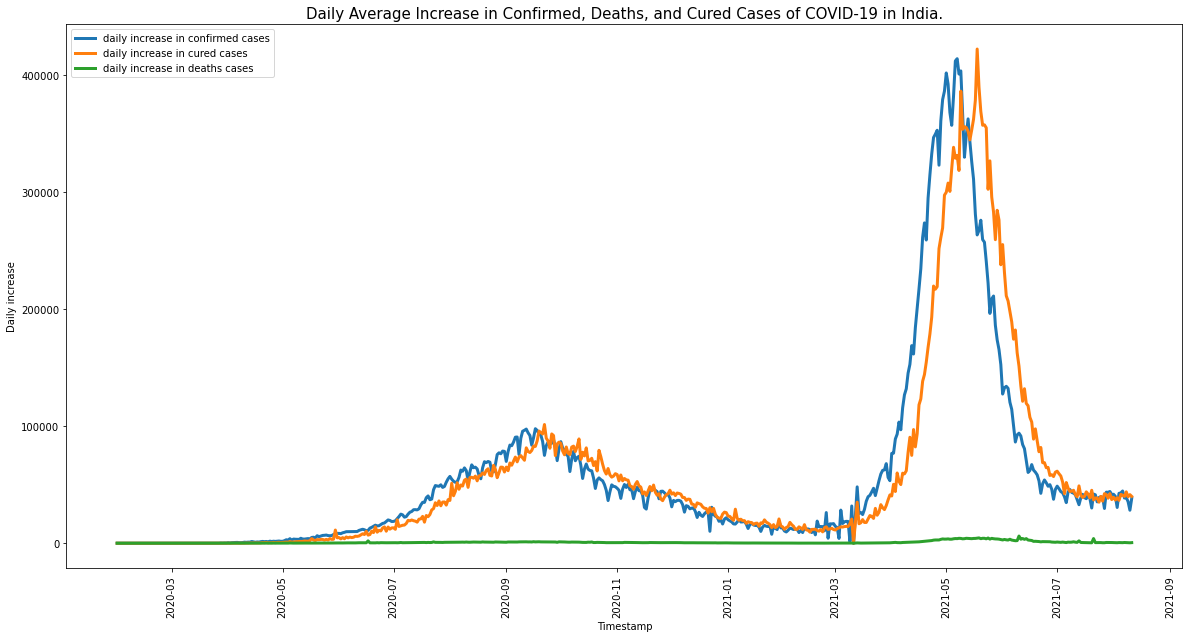

In [335]:
"""Line plot of Average increase in a day"""

print("Average increase in number of Confirmed cases everyday:",np.round(datewise["Confirmed"].diff().mean()))
print("Average increase in number of Cured cases everyday:",np.round(datewise["Cured"].diff().mean()))
print("Average increase in number of Deaths cases everyday:",np.round(datewise["Deaths"].diff().mean()))

fig = plt.figure(figsize=(20,10))
plt.plot(datewise["Confirmed"].diff(),label="daily increase in confirmed cases",linewidth=3)
plt.plot(datewise["Cured"].diff(),label="daily increase in cured cases",linewidth=3)
plt.plot(datewise["Deaths"].diff(),label="daily increase in deaths cases",linewidth=3)

plt.xlabel("Timestamp")
plt.ylabel("Daily increase")
plt.legend()
plt.xticks(rotation=90)
plt.title('Daily Average Increase in Confirmed, Deaths, and Cured Cases of COVID-19 in India.',size=15)
fig.set_facecolor('white')

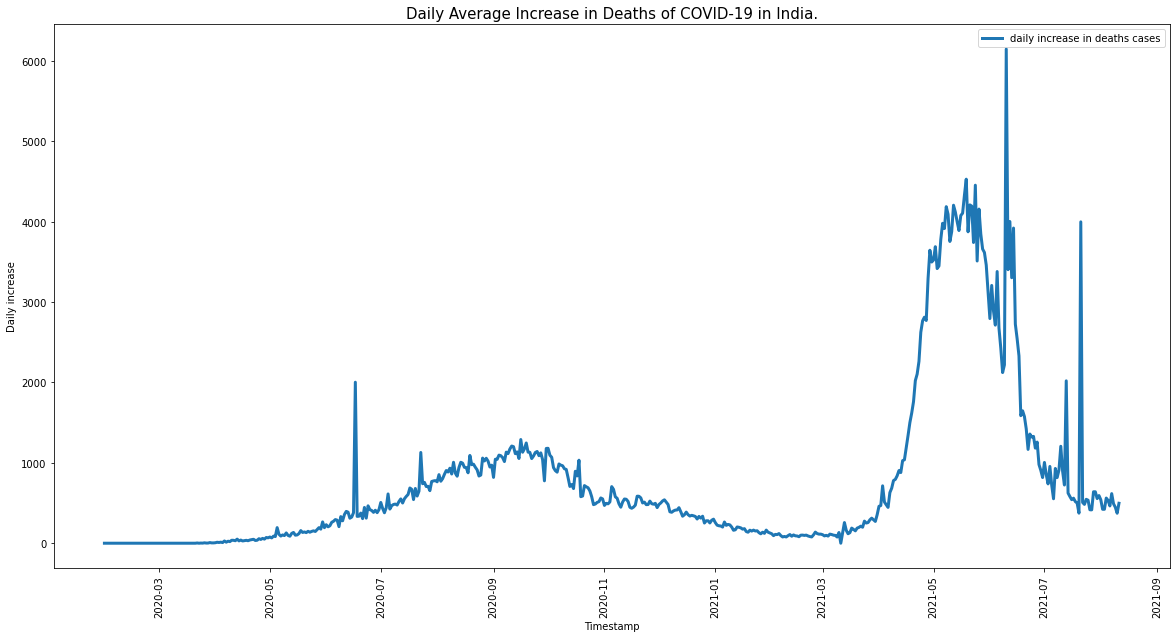

In [336]:
"""Clear observation to look at the daily average increase in Deaths case"""
fig = plt.figure(figsize=(20,10))
plt.plot(datewise["Deaths"].diff(),label="daily increase in deaths cases",linewidth=3)
plt.xlabel("Timestamp")
plt.ylabel("Daily increase")
plt.legend()
plt.xticks(rotation=90)
plt.title('Daily Average Increase in Deaths of COVID-19 in India.',size=15)
fig.set_facecolor('white')

#### Conclusion:
- Looking at the daily average increase in confirmed cases, we can see that there were multiple waves of the pandemic in India. The first wave peaked around September 2020, and then there was a decline in the number of new cases. However, in March 2021, there was a sharp increase in the number of new cases, which constituted the second wave of the pandemic. The peak of the second wave was much higher than the first wave, and it took longer for the number of new cases to decline.
- Similarly, looking at the daily average increase in cured cases, we can see that the number of cured cases increased steadily over time. This suggests that the medical infrastructure and treatment protocols in India improved over time, which is reflected in the increasing number of cured cases which is proportional to that of confirmed cases.
- In contrast, the daily average increase in deaths started to increase in April 2020 and reached a peak in June 2020. After that, there was a decline in the number of deaths, which lasted until March 2021. After that, there was a sharp increase in the number of deaths. The peak of the second wave was much higher than the first wave, and it took longer for the number of deaths to decline.

#### The Rise Of COVID-19 in India (since the 1st case recorded in Kerala)

- <b> Type of Plot </b>: Choropleth plot
-  <b> Reason </b>: A choropleth plot is a map-based visualization that uses colors to represent numerical data for regions or areas. It is a suitable choice for visualizing the distribution of COVID-19 cases across different regions in India. By using different shades of color, a choropleth map can quickly communicate the relative differences in the number of confirmed cases in different regions. It can also help identify any hotspots or areas of concern where the cases are high. Additionally, a choropleth map can provide a clear picture of the regional distribution of the pandemic and the spread of the disease over time.

In [337]:
"""
    Bear in mind that if you want to use the built-in notebook of VS Code, 
    it is recommended to make a renderers configuration. As the default 
    renderers of plotly I/O is `vscode`, you need to change it to
    `notebook_connected` to be able to render the background maps visualization
"""
import plotly.io as pio
pio.renderers.default = "notebook_connected"

In [338]:
"""Clone the data in the dataset, then change its date format from datetime64 to string object"""
df = df_India
df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%Y-%m-%d')

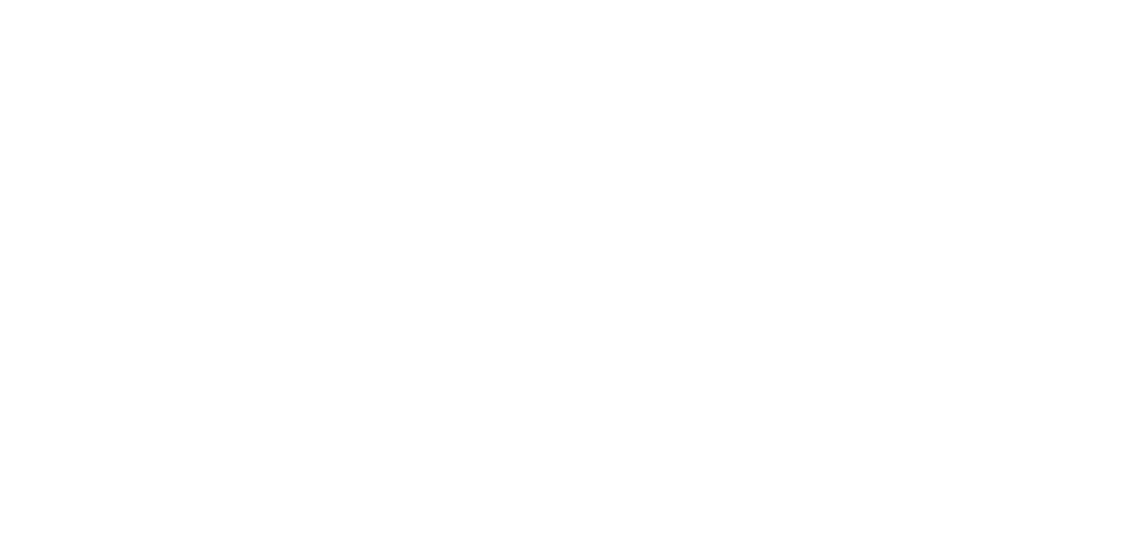

In [339]:
"""Choropleth plot of confirmed cases in India from 30th Jan 2020 until 11th Aug 2021"""
fig, ax = plt.subplots(1, figsize=(20, 10))
ax.axis('off')

fig = px.choropleth(data_frame = df, geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
                    locations= "State/UnionTerritory",
                    color= "Confirmed", 
                    hover_name= "State/UnionTerritory",
                    featureidkey="properties.ST_NM",
                    animation_frame="Date",
                    color_continuous_scale= 'RdYlGn_r',  #  color scale red, yellow green
                    )
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

#### Conclusion:
- The pandemic has affected all states and union territories of India, with varying degrees of severity.
- Maharashtra, Kerala, Karnataka, Tamil Nadu, and Andhra Pradesh are the top five states that have reported the highest number of confirmed cases throughout the pandemic.
- The states of Maharashtra and Kerala have been severely affected by the pandemic, and they continue to report high numbers of confirmed cases.
- The spread of the pandemic in India had two distinct phases. The first phase was from March 2020 to September 2020, during which the number of cases increased rapidly. The second phase was from March 2021 to May 2021, during which the number of cases increased even more rapidly, leading to a devastating second wave of the pandemic.
- After the peak of the second wave in May 2021, the number of cases started decreasing, but some states such as Kerala and Maharashtra continue to report a significant number of daily cases.
- Overall, the Choropleth plot provides a clear picture of the regional distribution of the pandemic and how the disease has spread over time in India. It highlights the need for a targeted and localized approach to contain the pandemic, based on the severity of the outbreak in different regions.

# 6. Machine Learning Algorithmns Applications 

## Create data

In [340]:
X = np.array([statewise['Confirmed']]).T
y = np.array([statewise['Cured']])[0]

## Load and visualize data

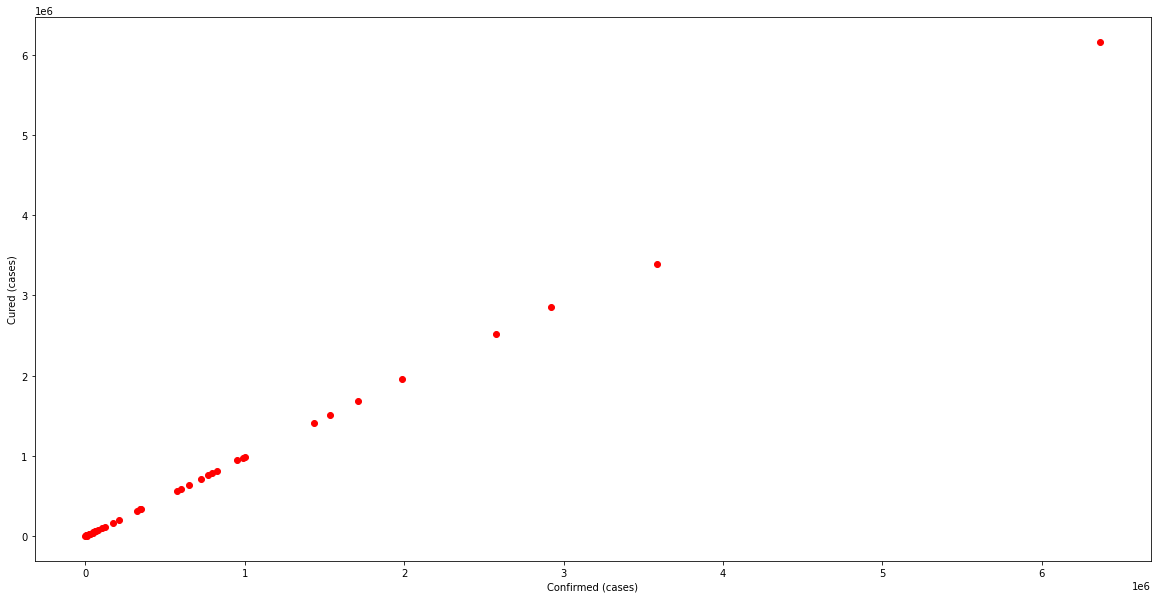

In [341]:
fig = plt.figure(figsize=(20,10))
plt.plot(X, y, 'ro')
plt.title('')
plt.xlabel('Confirmed (cases)')
plt.ylabel('Cured (cases)')
fig.set_facecolor("white")
plt.show()

- As we can observe from the graph, the majority of points lie in the center, forming a straight
 line. However, it is also noticed that there has been a few outliers in the data.

## Training function

In [342]:
def train_linear_regression(X, y):
    '''
    Trains Linear Regression on the dataset (X, y).
    
    Parameters
    ----------
    X : numpy array, shape (m, d + 1)
        The matrix of input vectors (each row corresponds to an input vector); 
        the first column of this matrix is all ones (corresponding to x_0).
    y : numpy array, shape (m, 1)
        The vector of outputs.
    
    Returns
    -------
    w : numpy array, shape (d + 1, 1)
        The vector of parameters of Linear Regression after training.
    '''
    # TODO
    A = np.dot(X.T, X)
    b = np.dot(X.T, y)
    w = np.dot(np.linalg.pinv(A), b)
    return w

In [343]:
# Build Xbar 
first_one = np.ones((X.shape[0], 1))
one_added_X = np.concatenate((first_one, X), axis = 1)
print ('one_added_X.shape =', one_added_X.shape)
print ('y.shape =', y.shape)

one_added_X.shape = (38, 2)
y.shape = (38,)


## Train model

In [344]:
# Calculate weights of the fitting line 
w = train_linear_regression(one_added_X, y)
print('w = ', w)

w =  [5.05789650e+03 9.68261975e-01]


In [345]:
# Calculate predictions
preds = np.dot(one_added_X,w)
preds

array([1.23663379e+04, 1.92723414e+06, 5.40567937e+04, 5.62921065e+05,
       7.07317973e+05, 1.40288437e+04, 6.50823928e+04, 9.76569359e+05,
       1.53737596e+04, 1.39630705e+06, 1.71681258e+05, 8.03956328e+05,
       7.50729999e+05, 2.07052837e+05, 3.17584782e+05, 3.41470837e+05,
       2.83339857e+06, 3.47791634e+06, 2.48210917e+04, 1.49951692e+04,
       7.71902015e+05, 6.16653681e+06, 1.07135947e+05, 7.26125662e+04,
       4.99077912e+04, 3.29544923e+04, 9.62666085e+05, 1.22959284e+05,
       5.85601634e+05, 9.28635549e+05, 3.21866605e+04, 2.50233140e+06,
       6.34769977e+05, 8.31579074e+04, 5.13245268e+03, 1.65963558e+06,
       3.36650829e+05, 1.49133906e+06])

## Visualize results

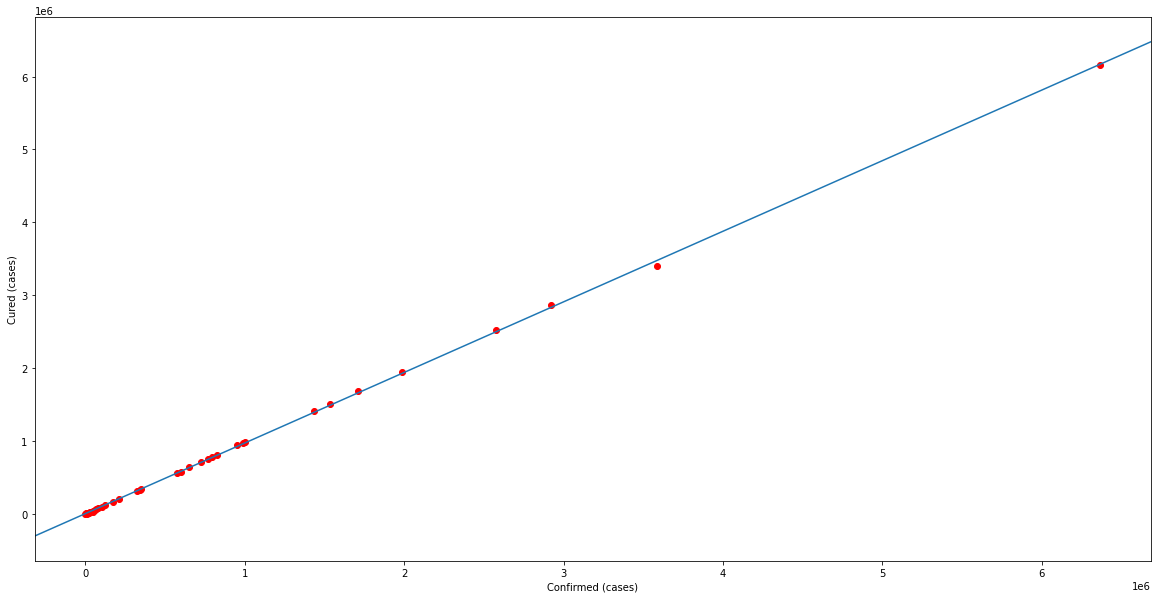

In [346]:
# Visualize results
fig = plt.figure(figsize=(20,10))
plt.plot(X, y, 'ro')     # data 

X_min, X_max = plt.xlim()
X_axis = np.array([X_min, X_max]).reshape(-1, 1)

ones_added_axis = np.concatenate((np.ones((X_axis.shape[0],1)), X_axis), axis=1)
preds_axis = np.dot(ones_added_axis,w)

# Draw the fitting line 
plt.plot(X_axis,preds_axis)               # the fitting line
plt.xlabel('Confirmed (cases)')
plt.ylabel('Cured (cases)')
plt.xlim(X_min, X_max)
fig.set_facecolor("white")
plt.show()